In [21]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [22]:
# 设置本实验是可以重复的
torch.manual_seed(1)

In [23]:
# 设置回归的内容
x=torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
print(x.shape)

torch.Size([100, 1])


In [34]:
y=x.pow(2)+0.2*torch.rand(x.size())
print(y.shape)

torch.Size([100, 1])


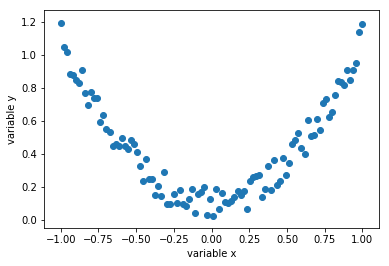

In [35]:
# 尝试画出点图
plt.scatter(x.data.numpy(),y.data.numpy())
plt.xlabel("variable x")
plt.ylabel("variable y")
plt.show()

### 在定义网络结构之前，需要画出整体的计算图是怎么的形式，然后确定输入和输出以及参数
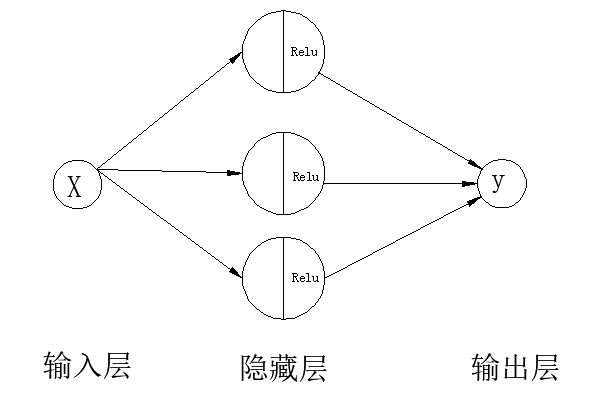

In [36]:
# 重点是定义下面的神经网络，看下神经网络定义的具体结构
# 里面存在两个必要的函数，一个是__init__()函数，一个是前向计算，然后是里面特定参数的定义
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        # 定义隐藏层输入的size为ｎ_feature,输出的size为ｎ_hidden
        self.hidden=torch.nn.Linear(n_feature,n_hidden)  # hidden layer
        self.predict=torch.nn.Linear(n_hidden,n_output)  # output layer
        
    def forward(self,x):
        x=F.relu(self.hidden(x))   # activation function for hidden layer
        y=self.predict(x)          # linear output
        return y
    

In [37]:
# 初始化网络
net=Net(n_feature=1,n_hidden=10,n_output=1)
print(net) # 输出net的参数

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


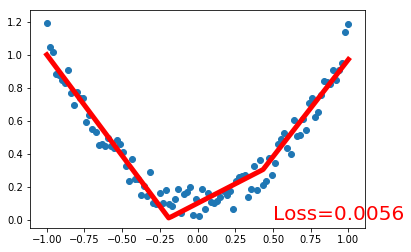

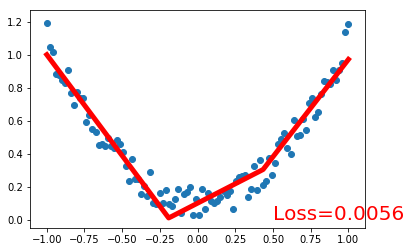

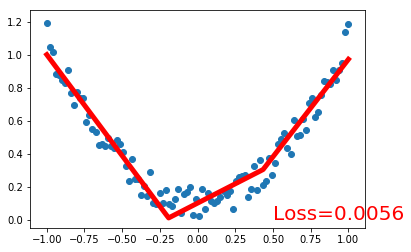

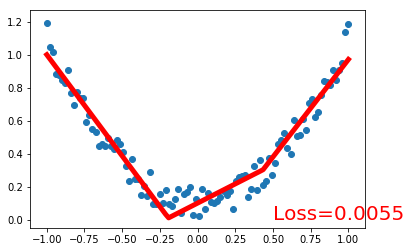

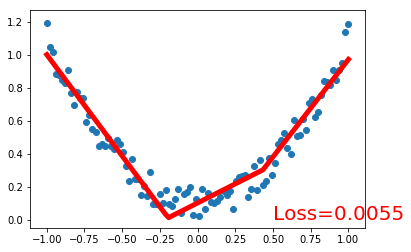

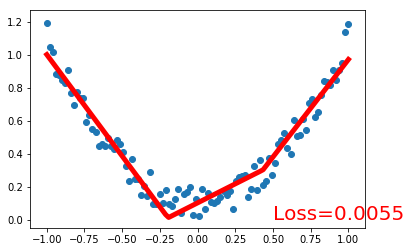

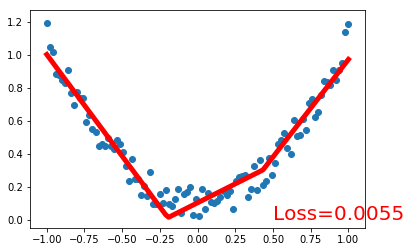

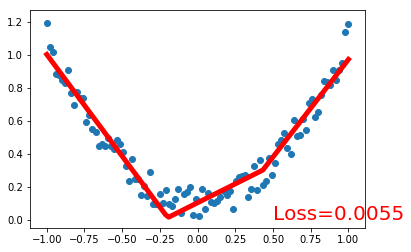

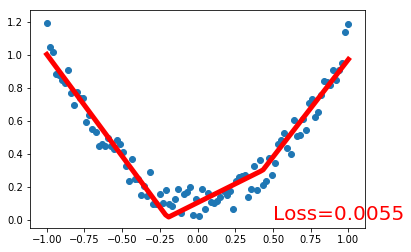

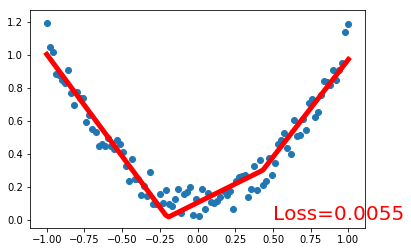

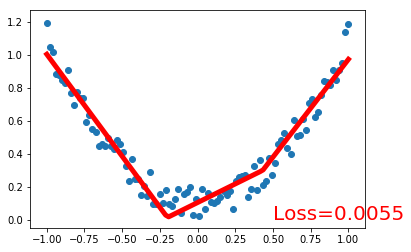

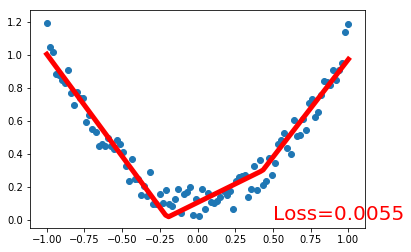

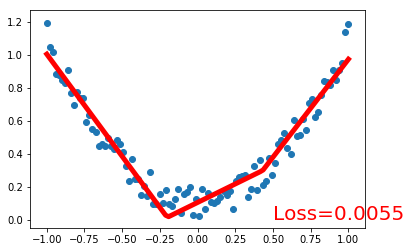

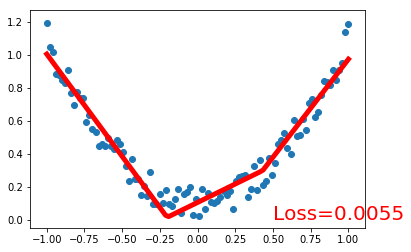

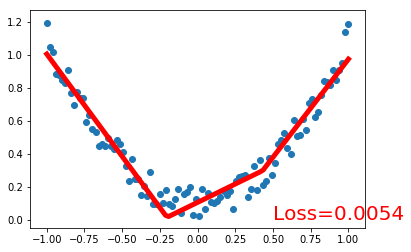

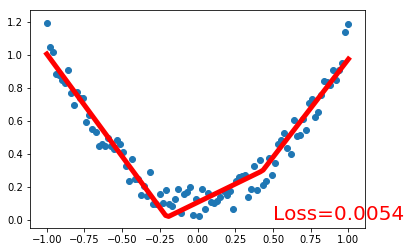

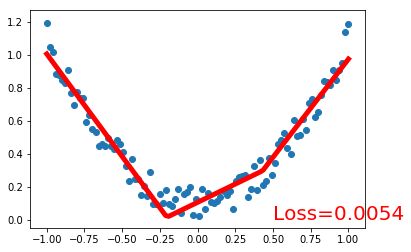

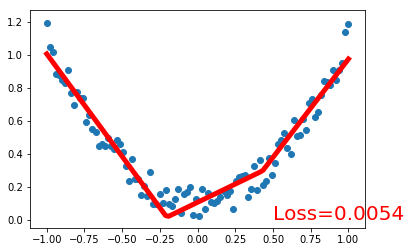

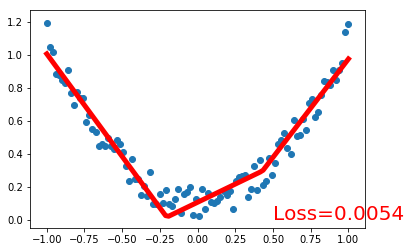

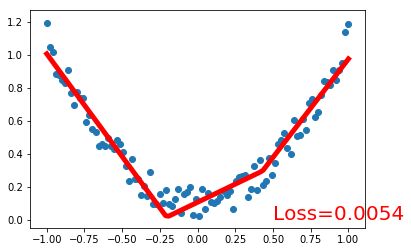

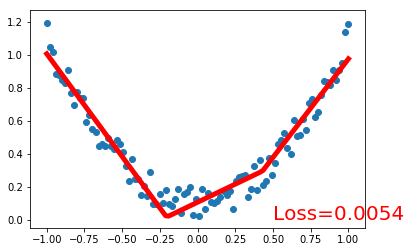

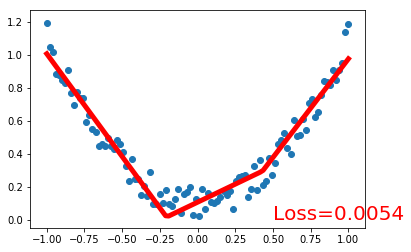

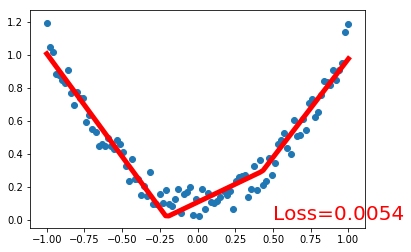

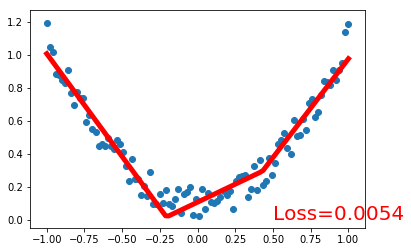

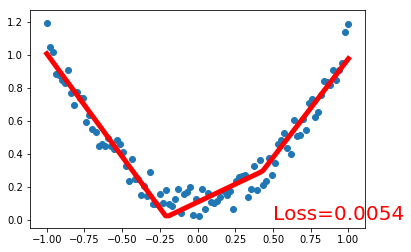

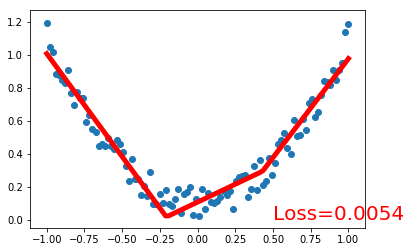

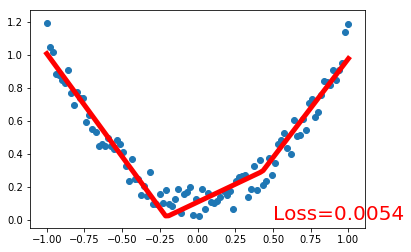

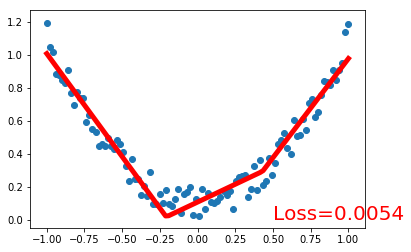

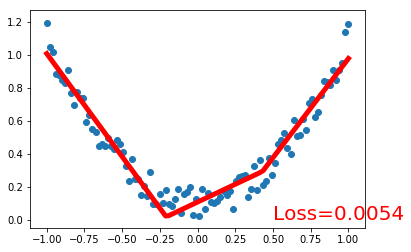

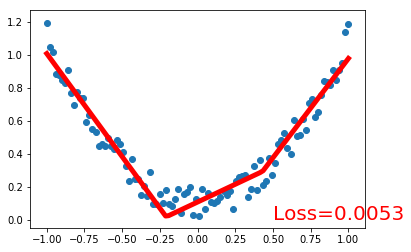

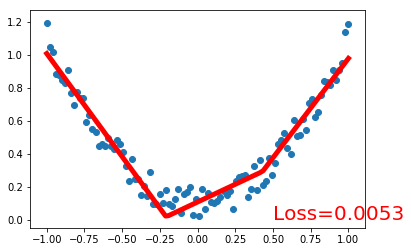

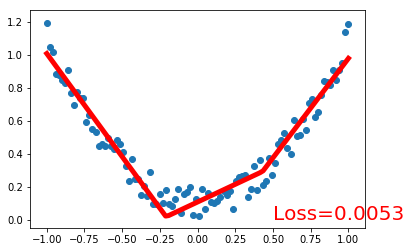

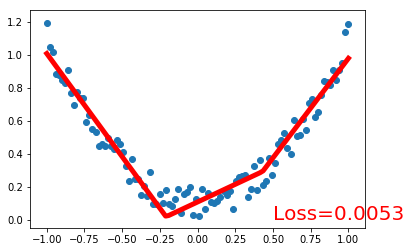

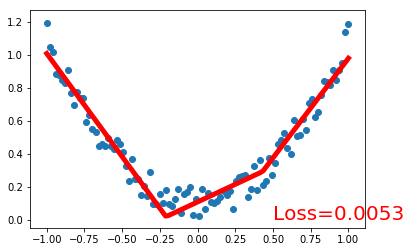

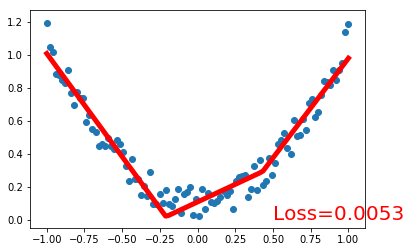

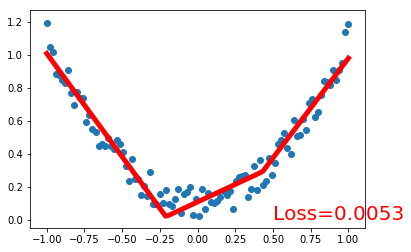

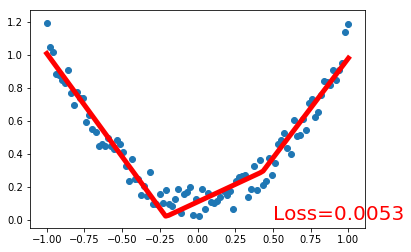

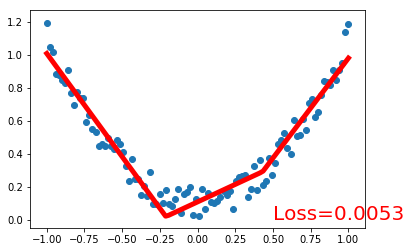

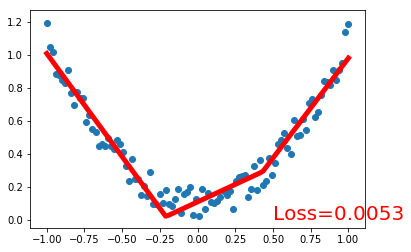

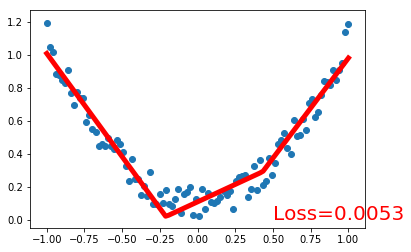

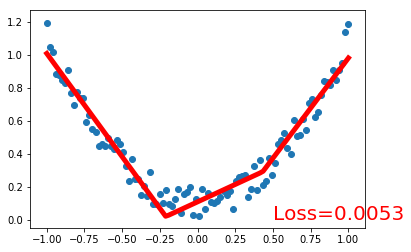

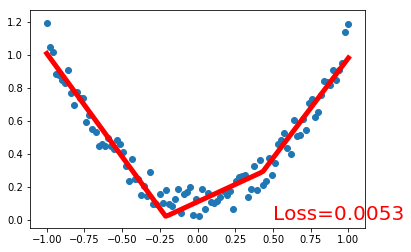

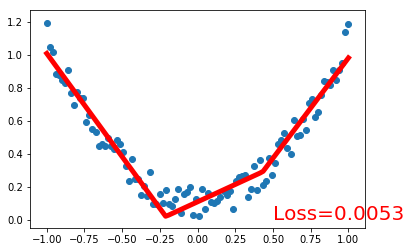

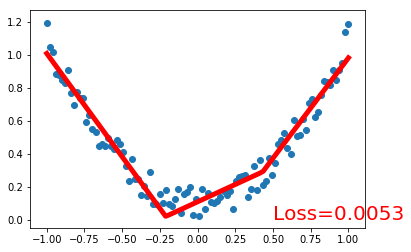

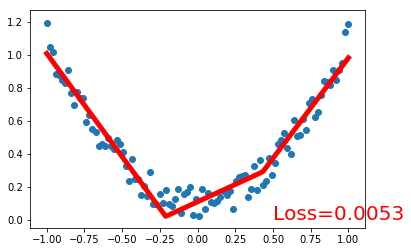

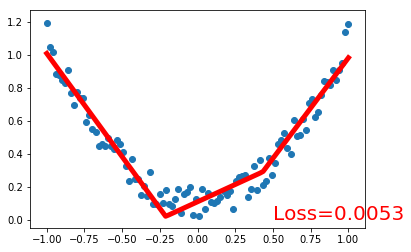

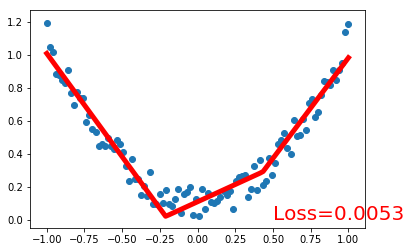

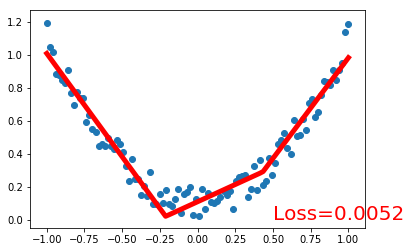

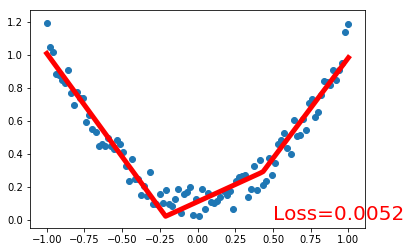

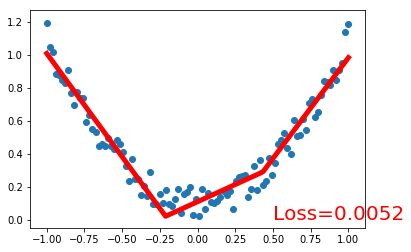

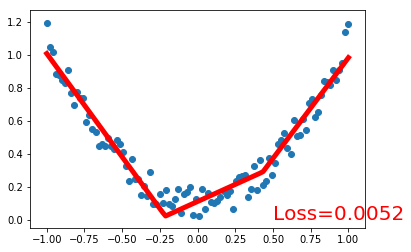

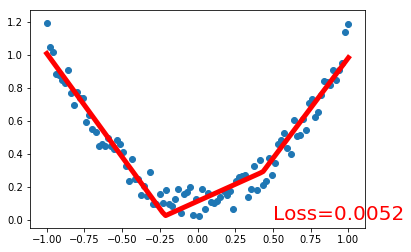

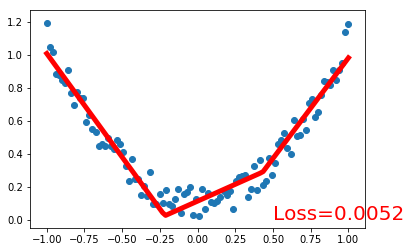

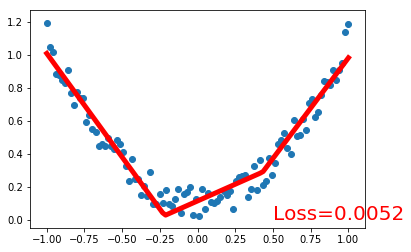

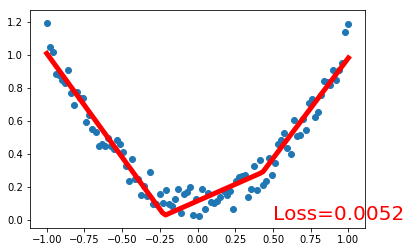

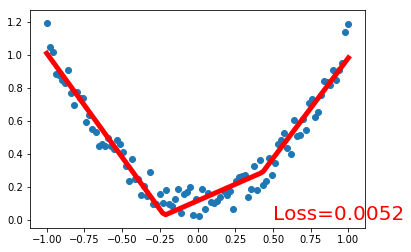

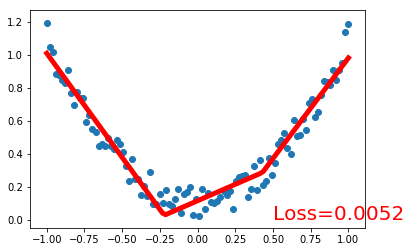

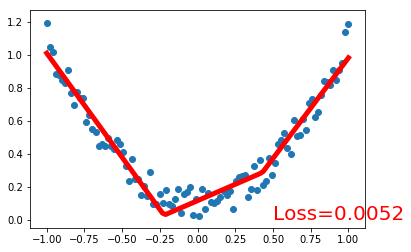

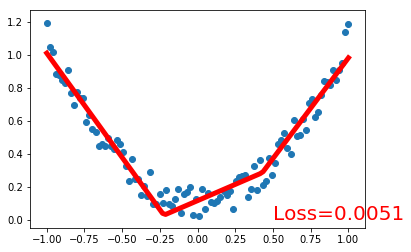

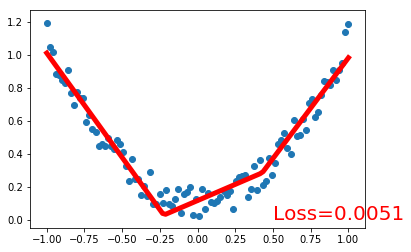

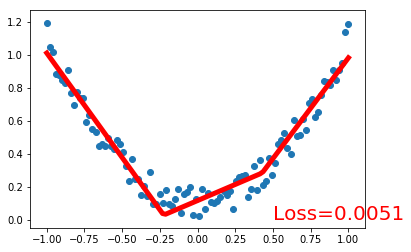

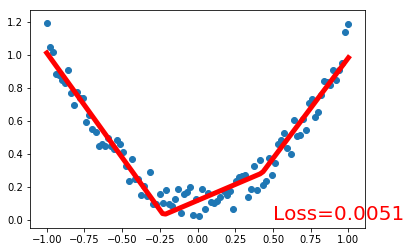

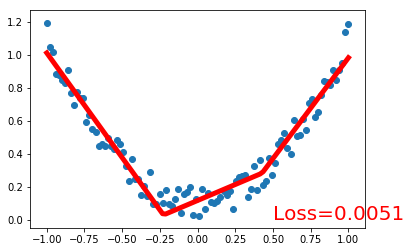

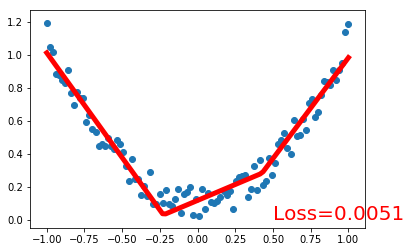

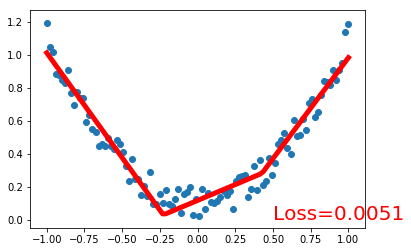

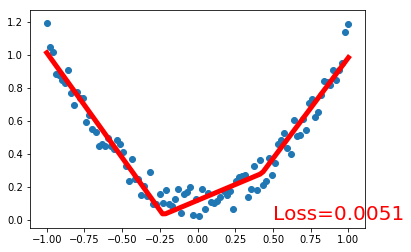

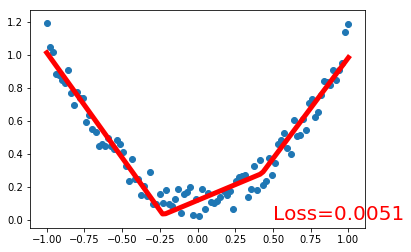

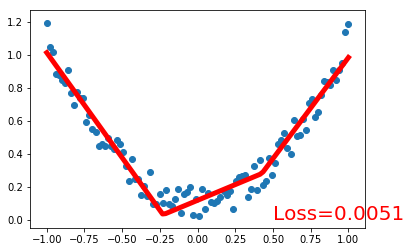

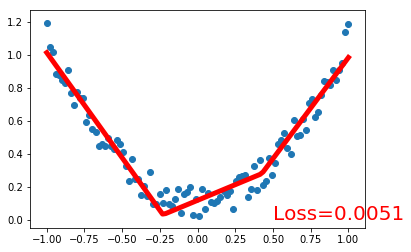

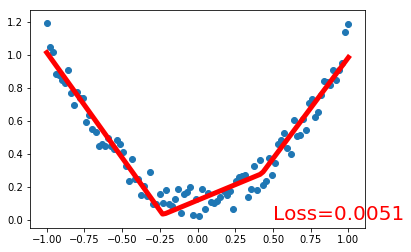

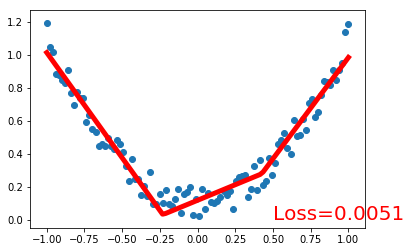

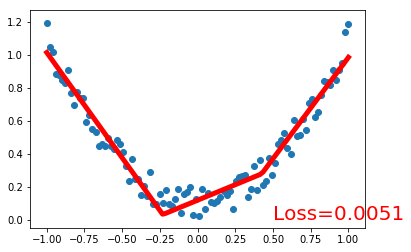

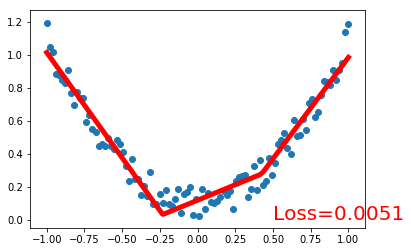

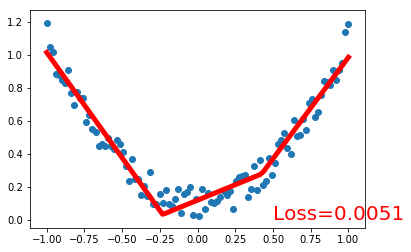

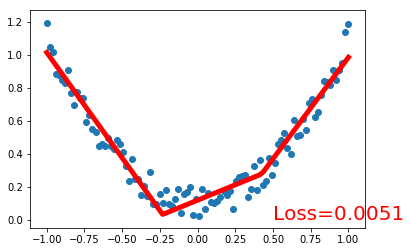

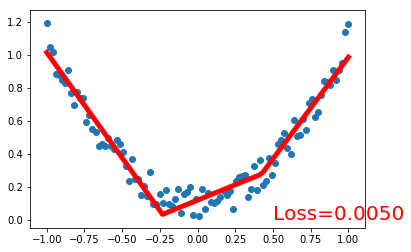

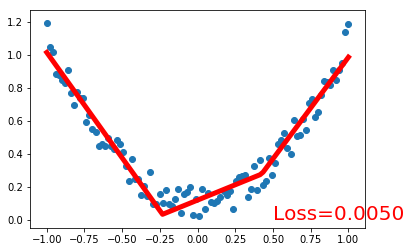

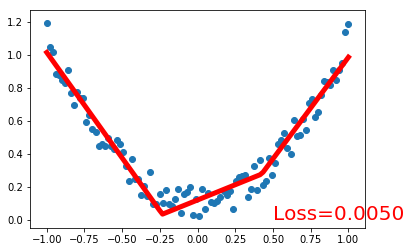

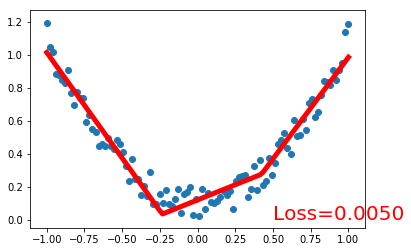

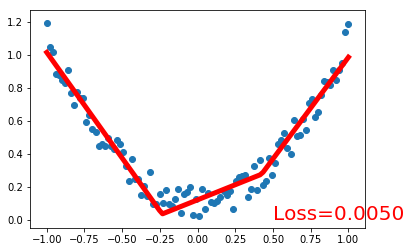

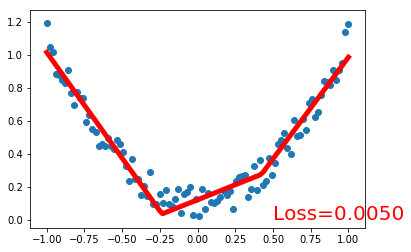

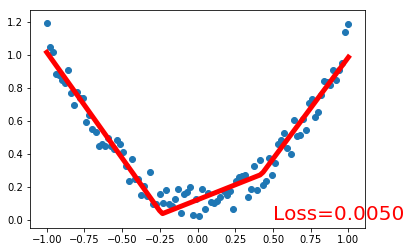

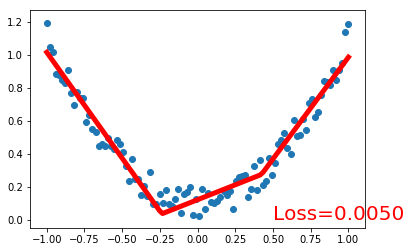

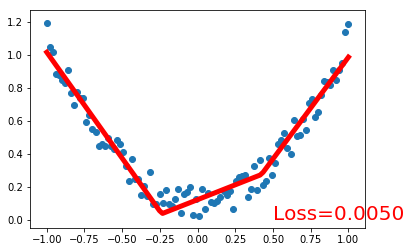

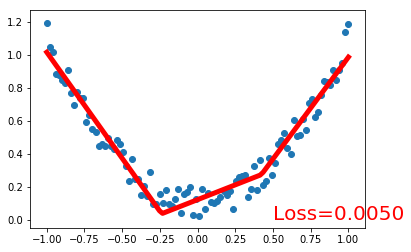

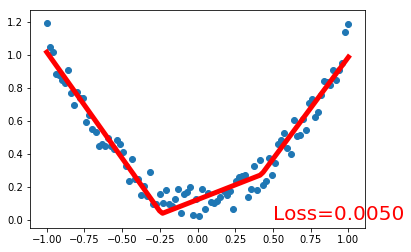

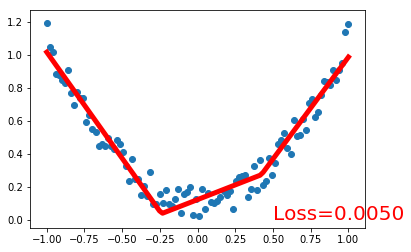

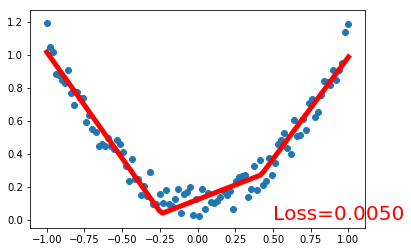

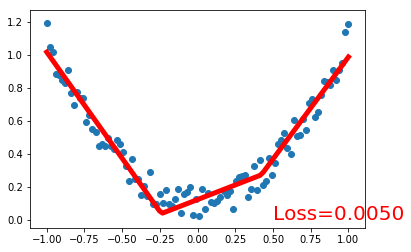

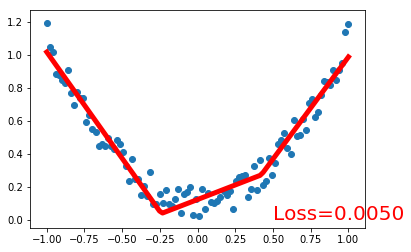

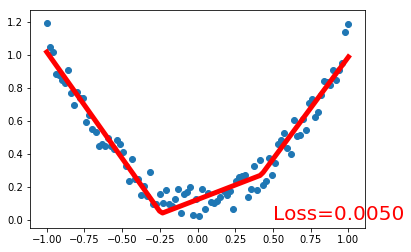

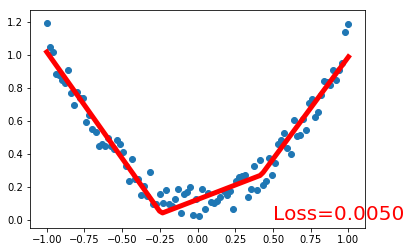

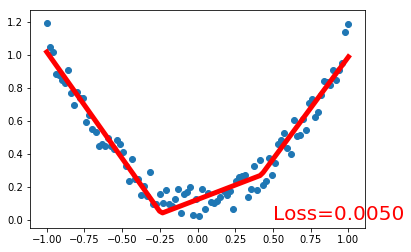

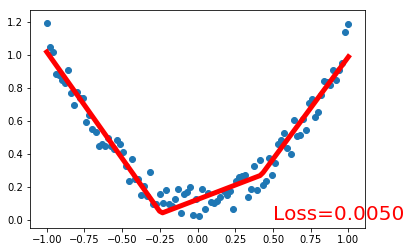

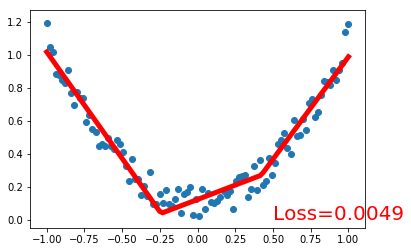

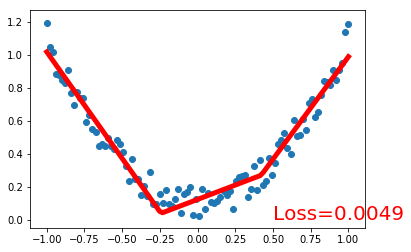

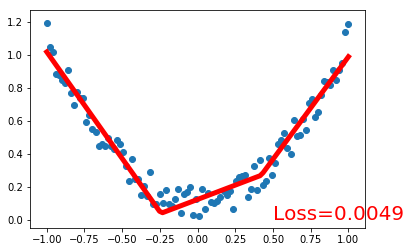

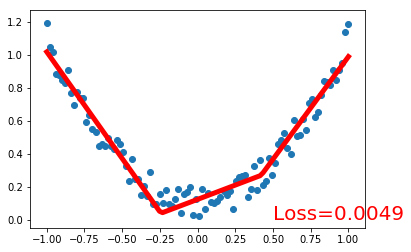

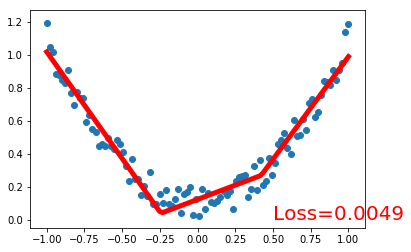

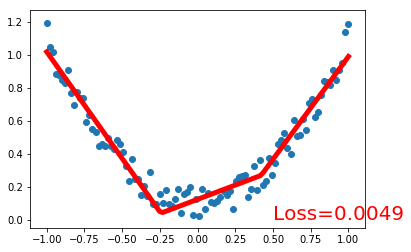

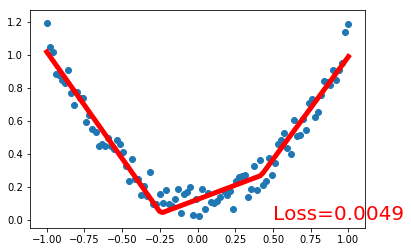

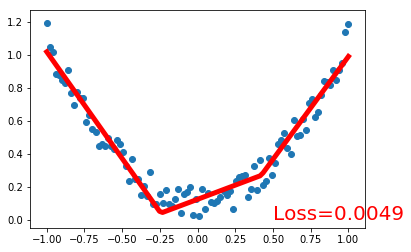

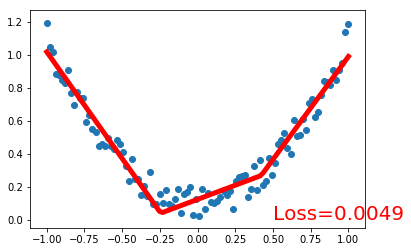

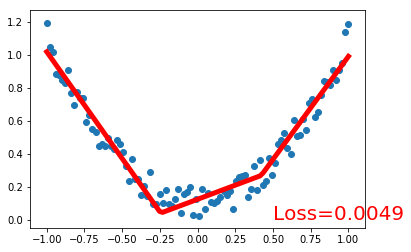

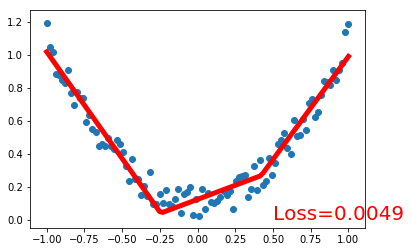

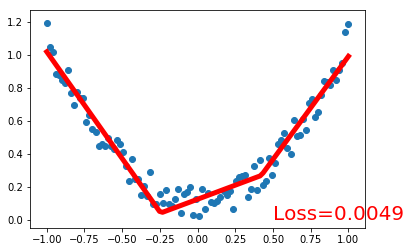

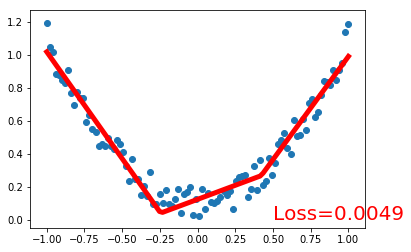

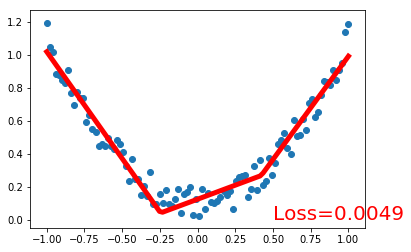

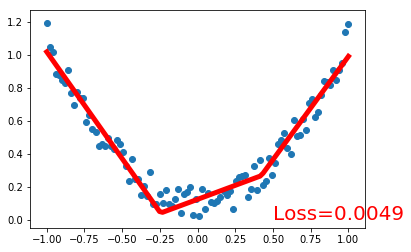

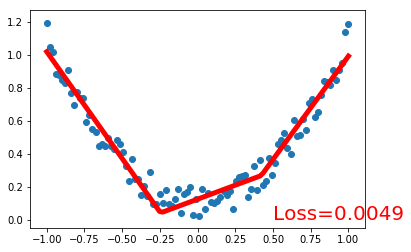

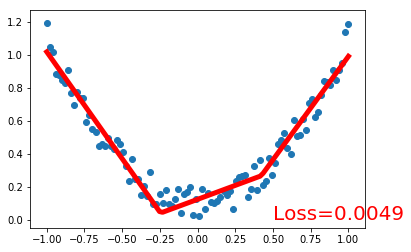

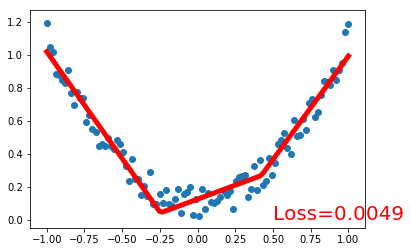

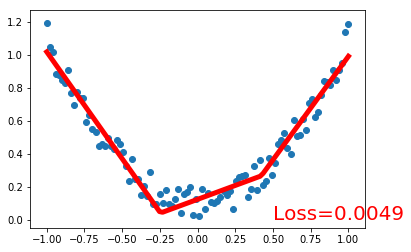

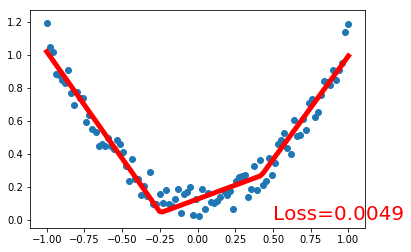

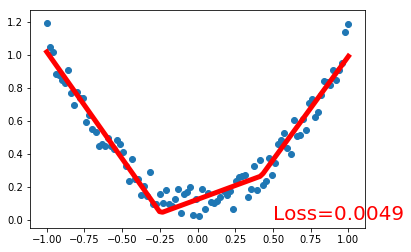

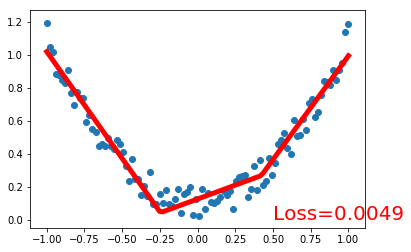

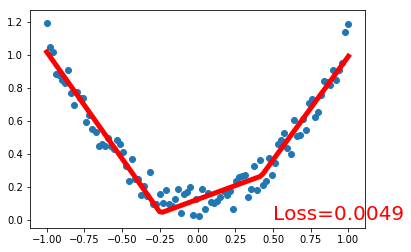

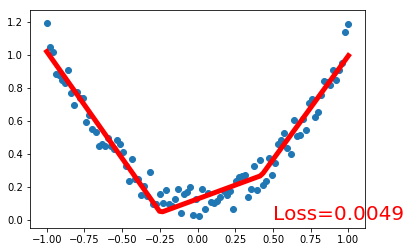

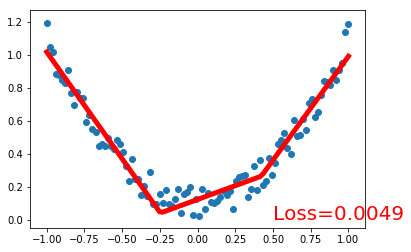

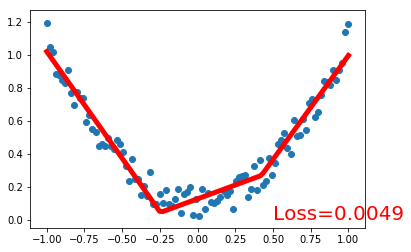

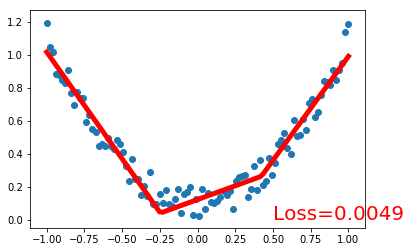

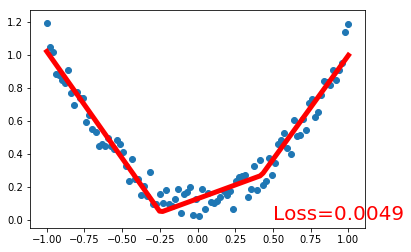

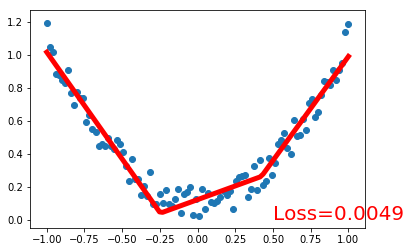

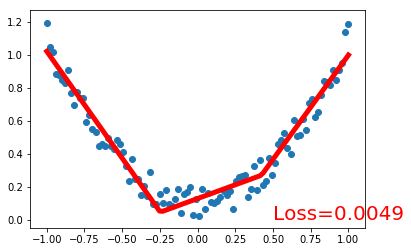

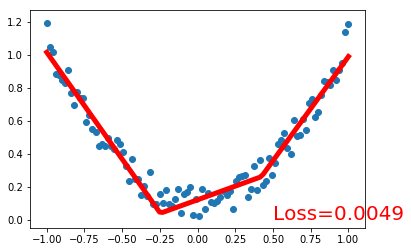

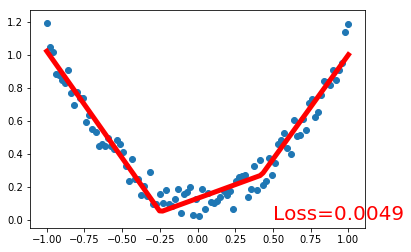

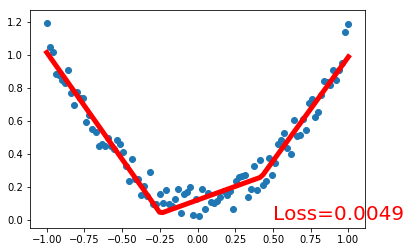

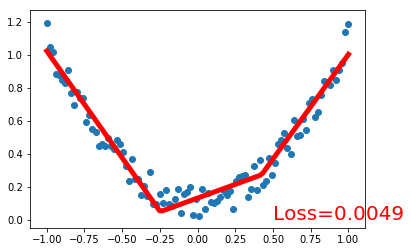

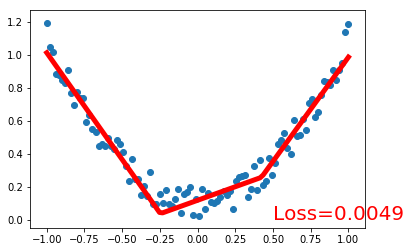

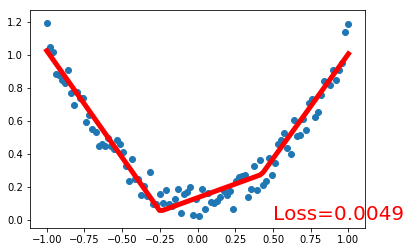

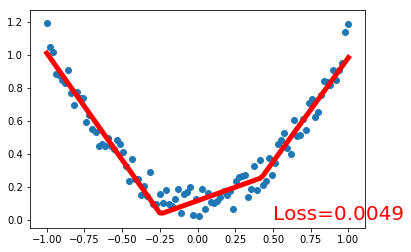

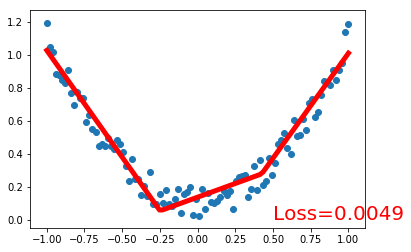

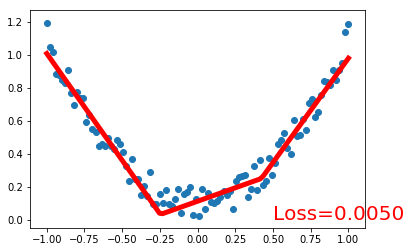

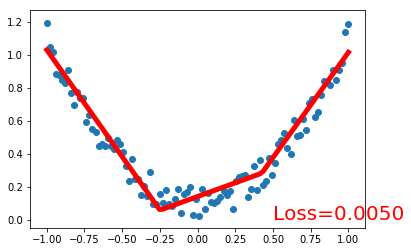

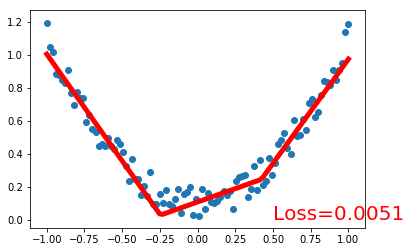

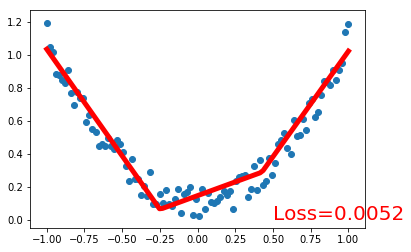

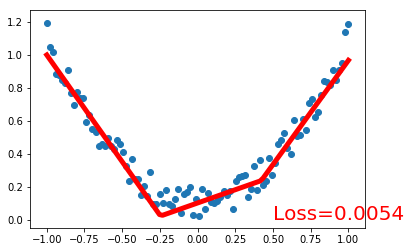

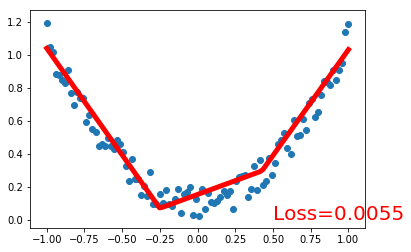

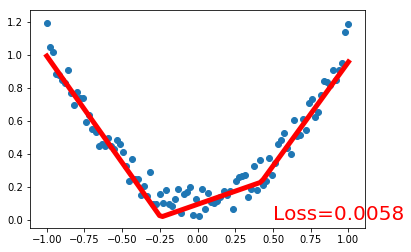

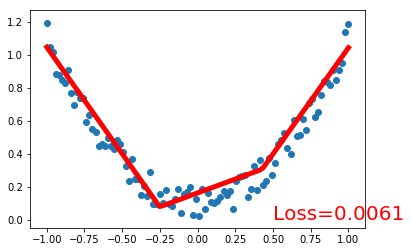

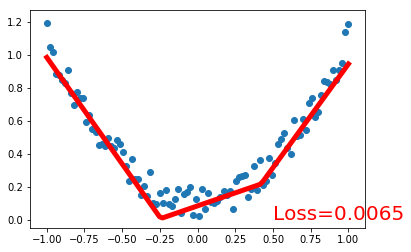

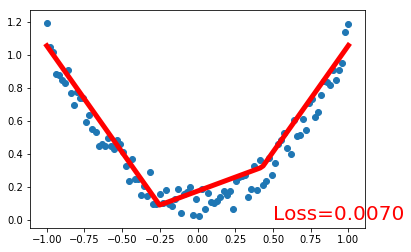

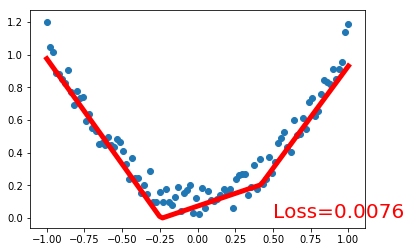

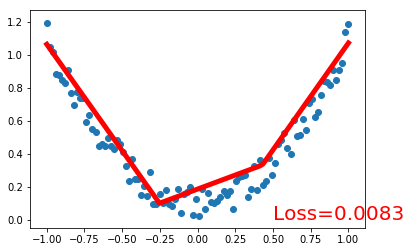

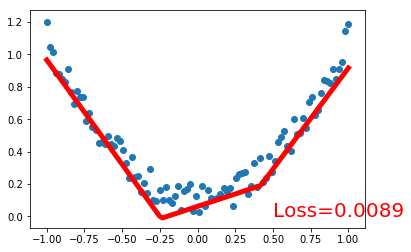

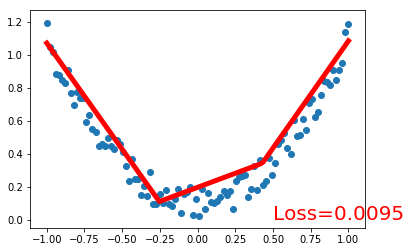

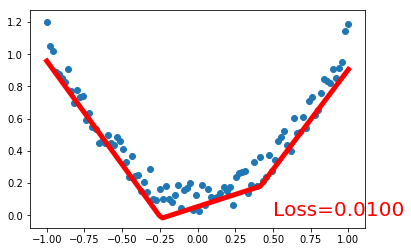

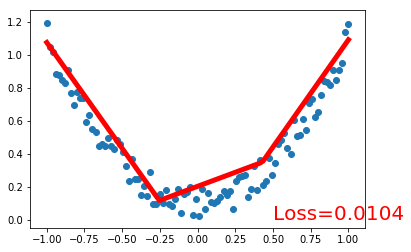

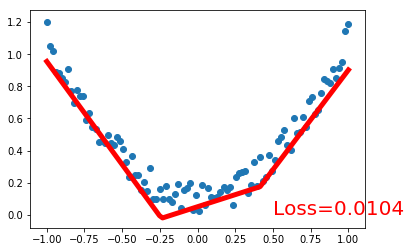

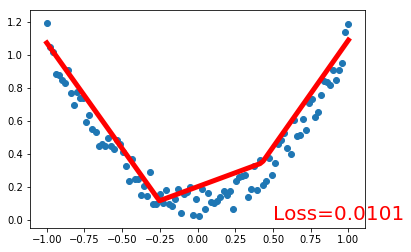

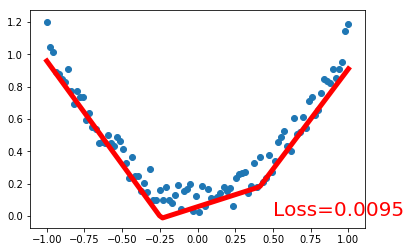

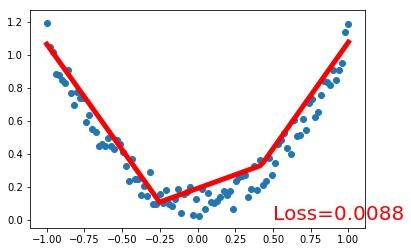

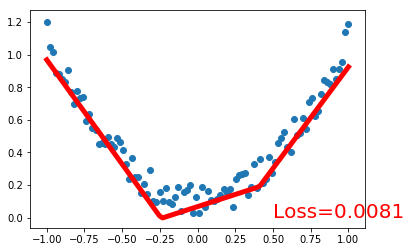

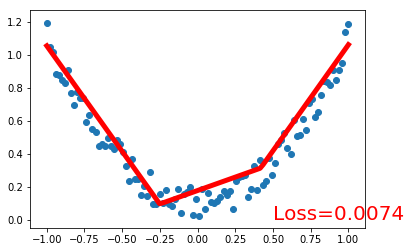

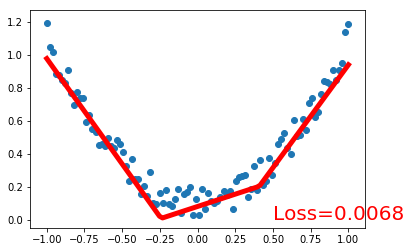

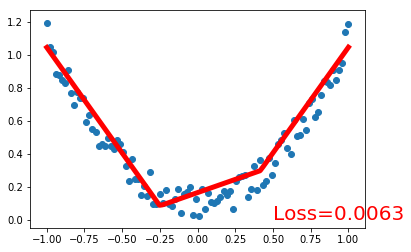

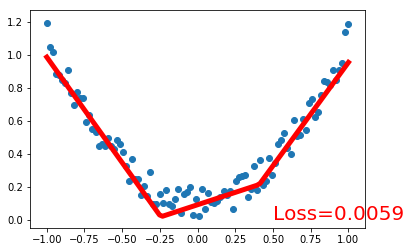

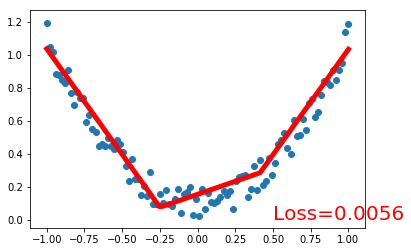

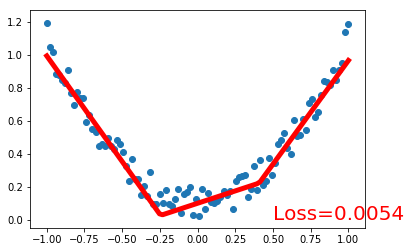

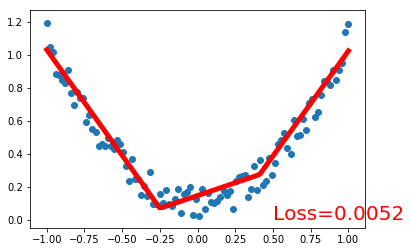

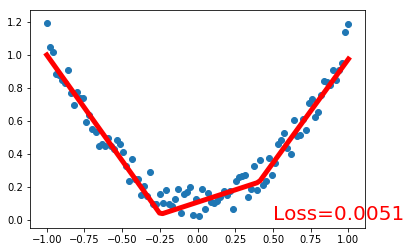

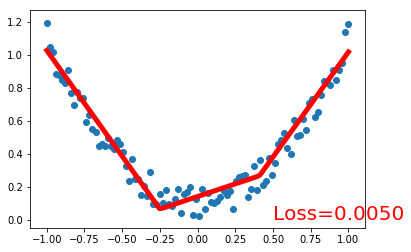

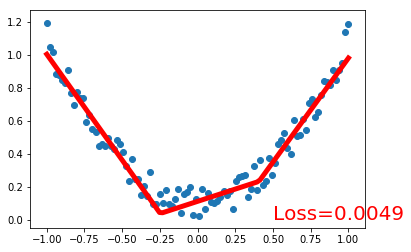

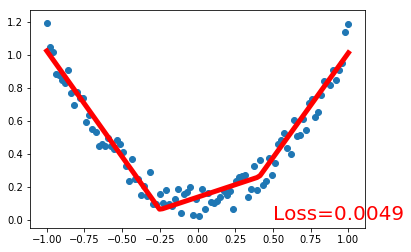

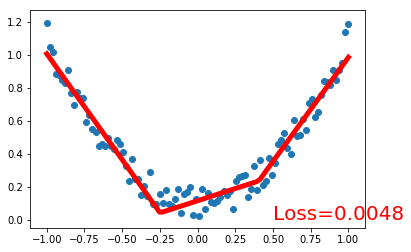

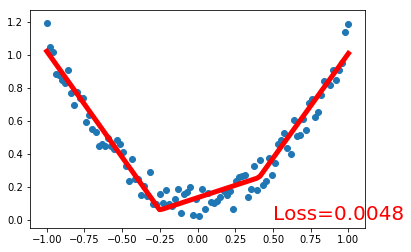

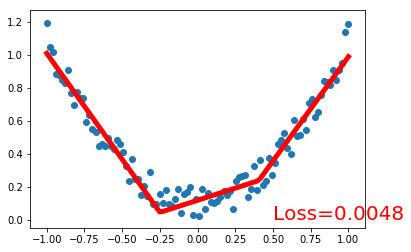

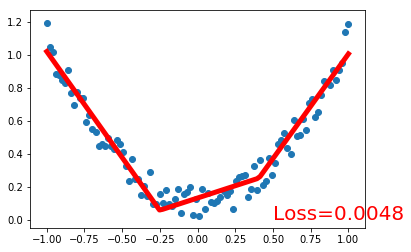

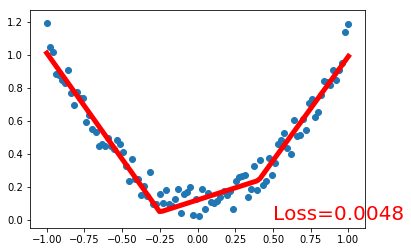

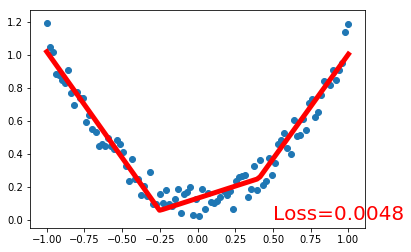

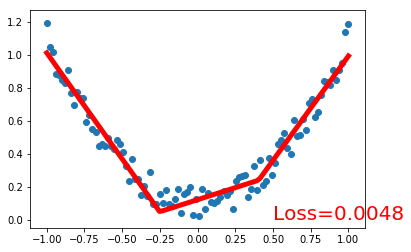

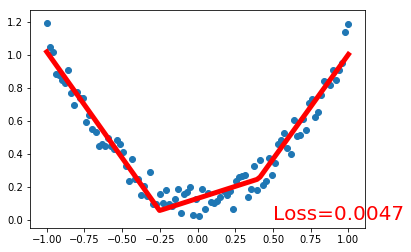

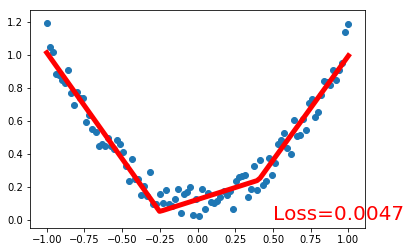

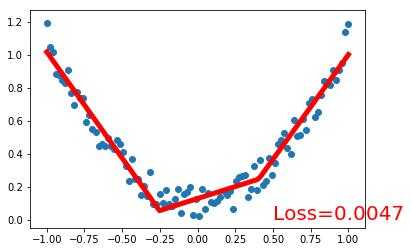

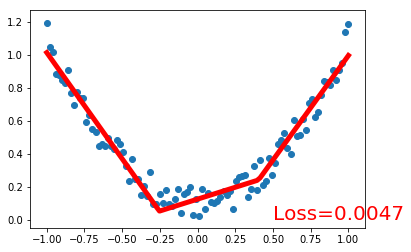

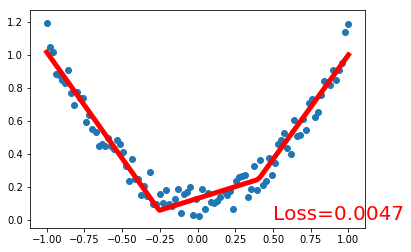

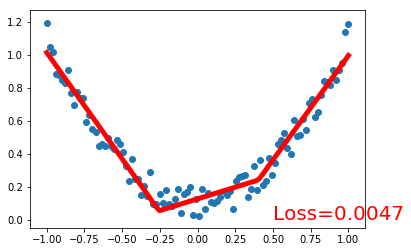

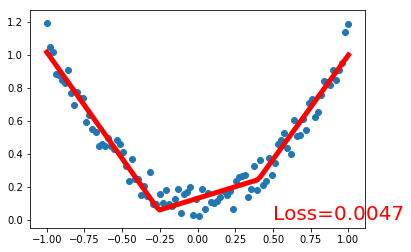

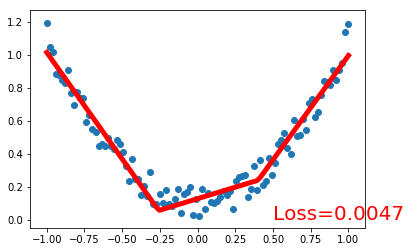

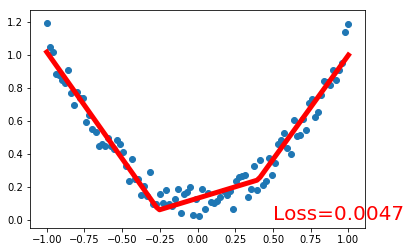

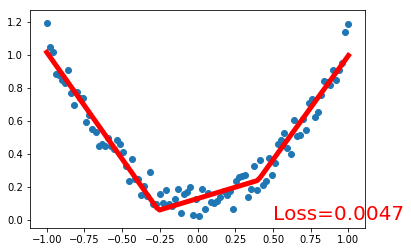

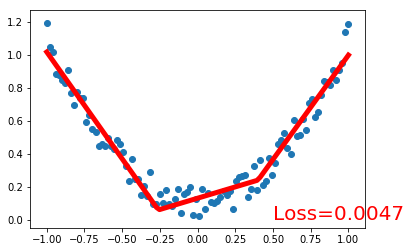

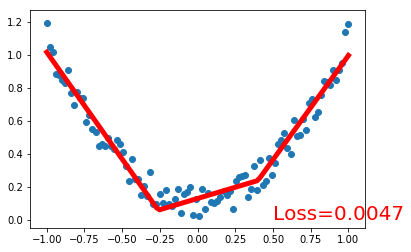

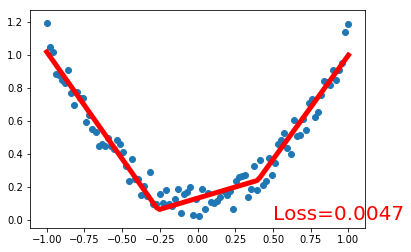

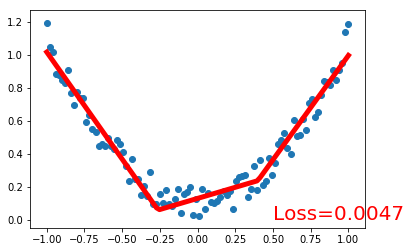

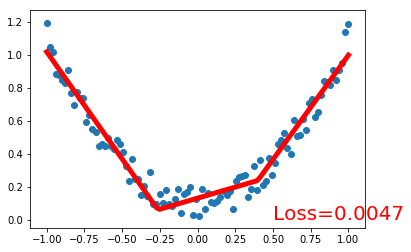

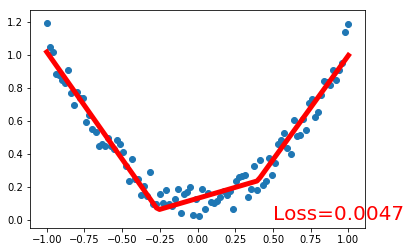

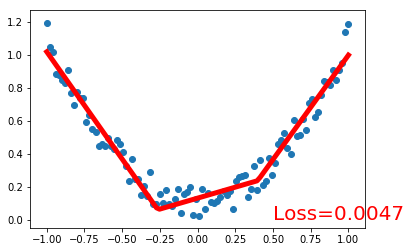

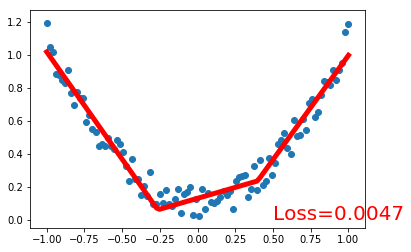

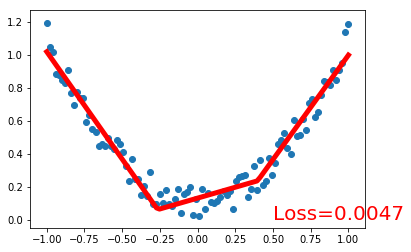

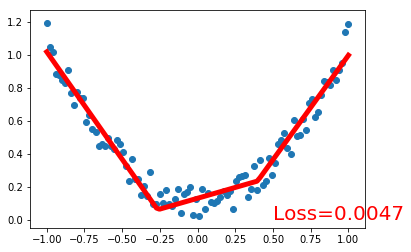

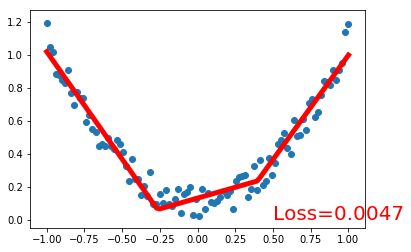

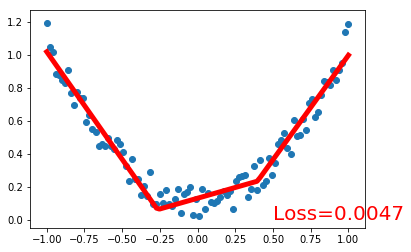

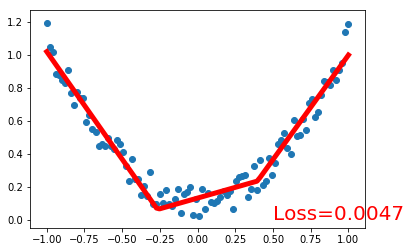

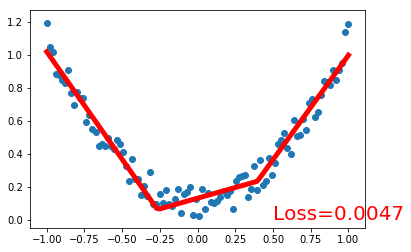

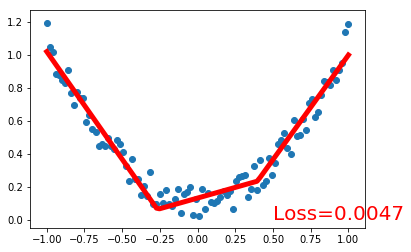

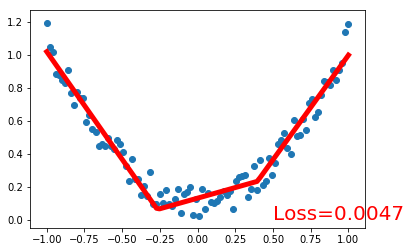

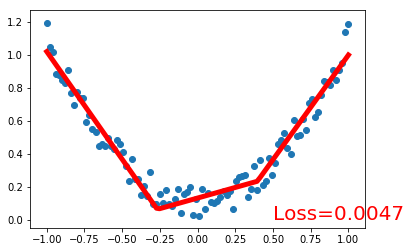

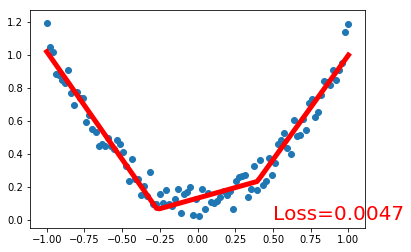

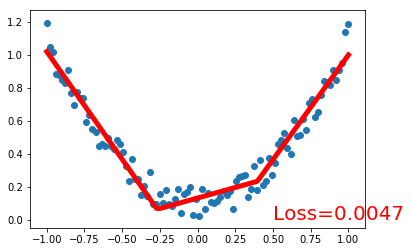

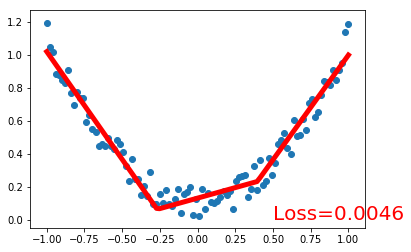

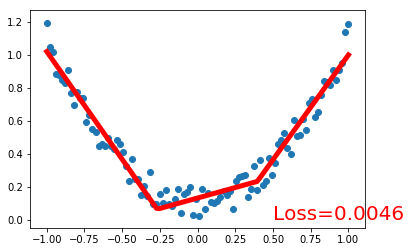

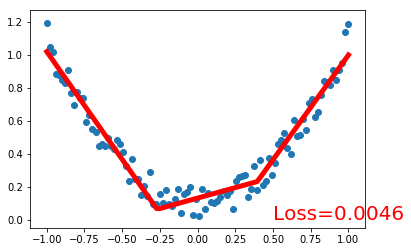

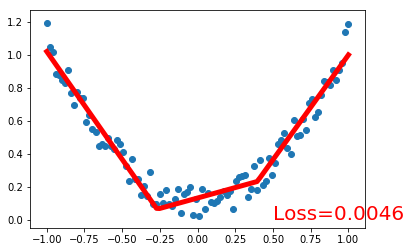

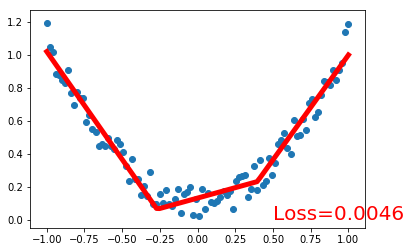

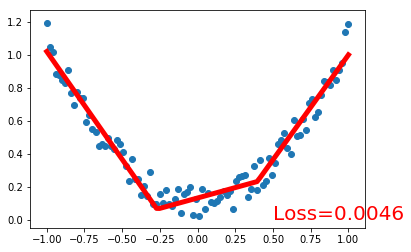

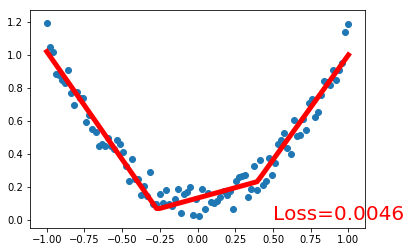

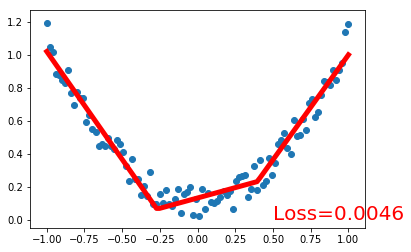

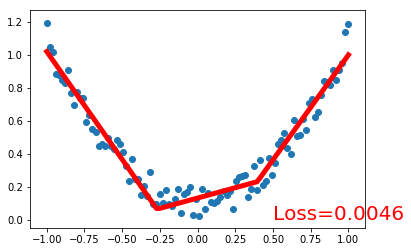

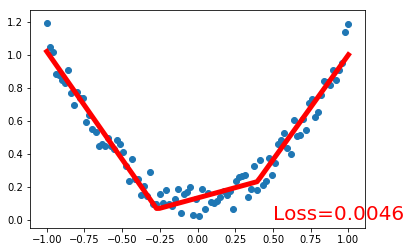

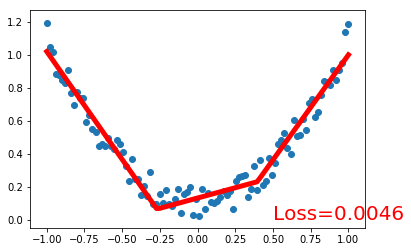

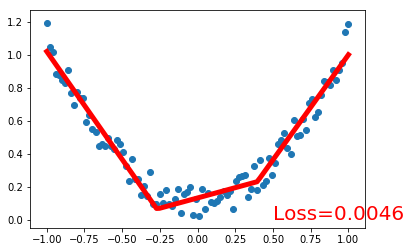

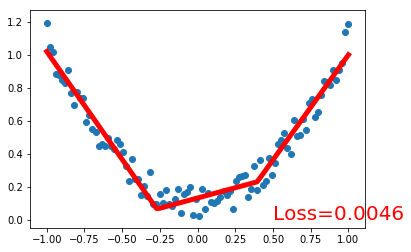

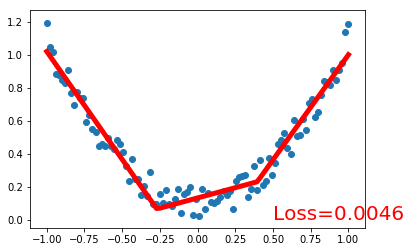

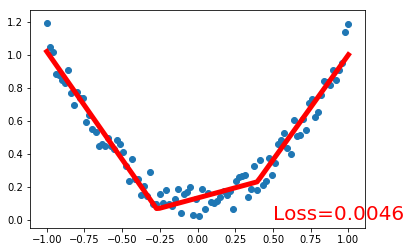

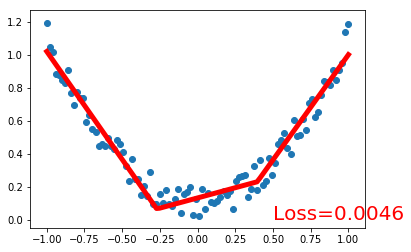

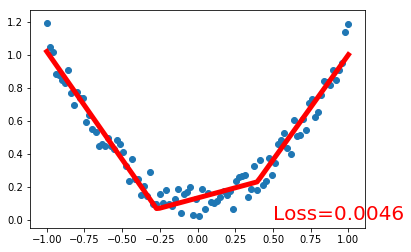

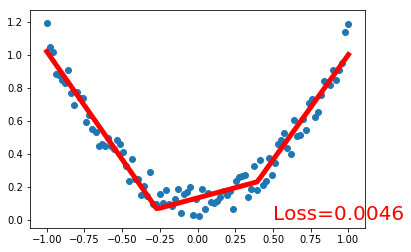

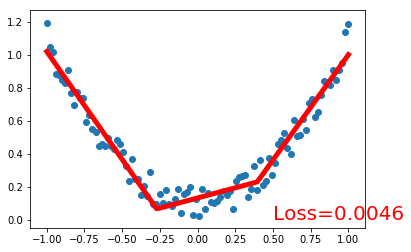

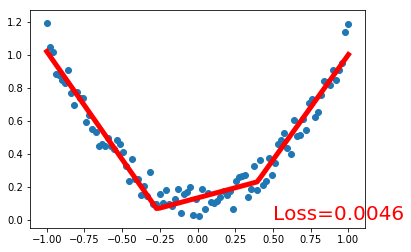

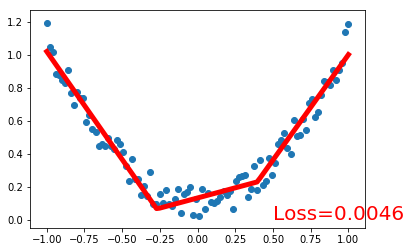

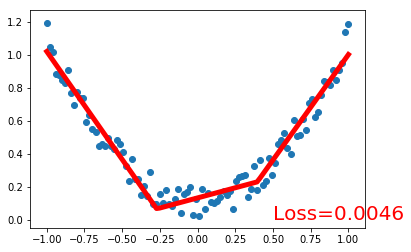

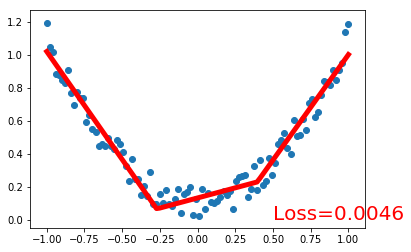

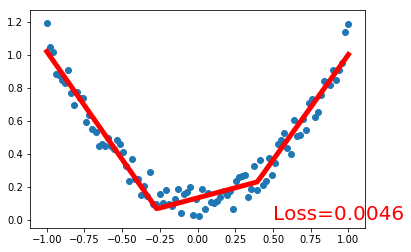

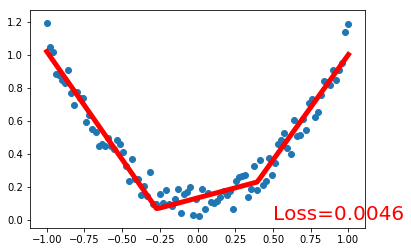

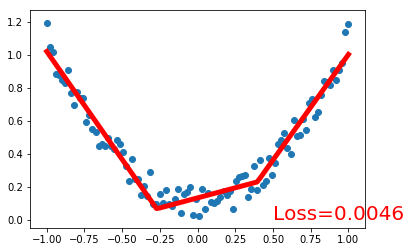

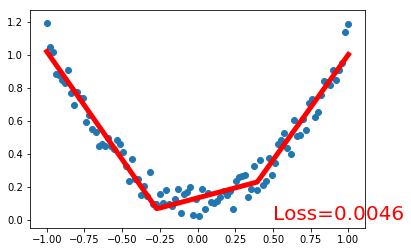

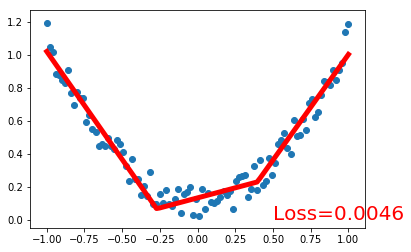

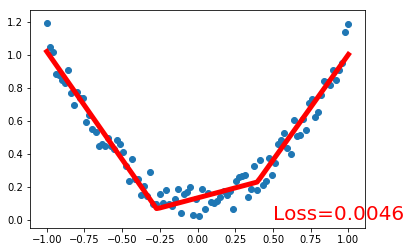

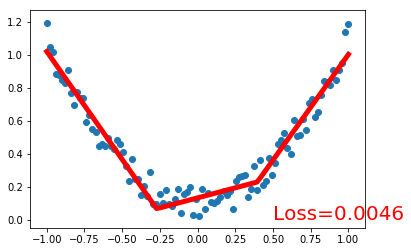

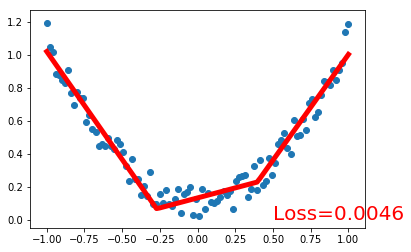

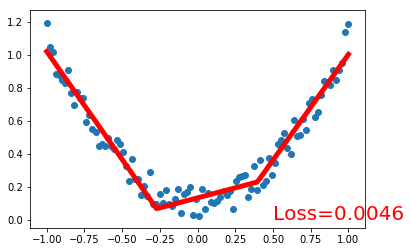

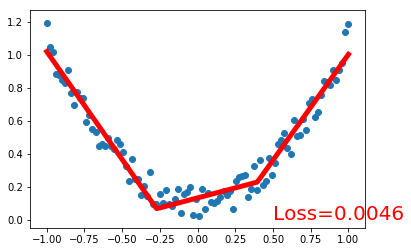

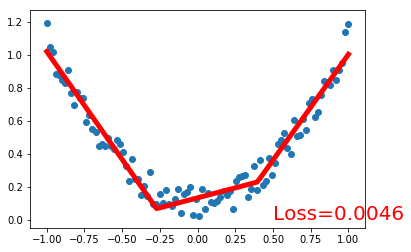

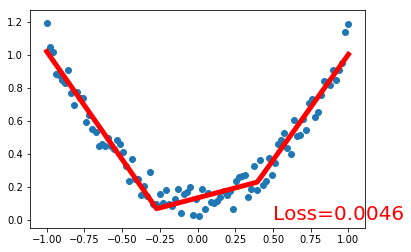

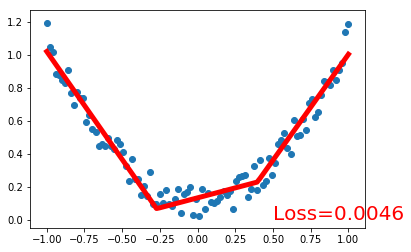

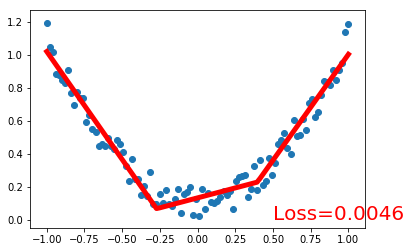

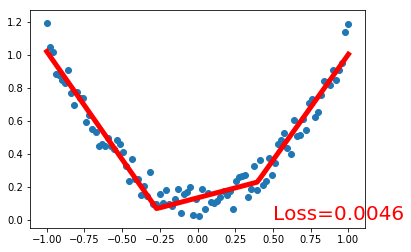

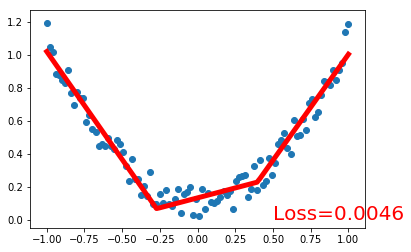

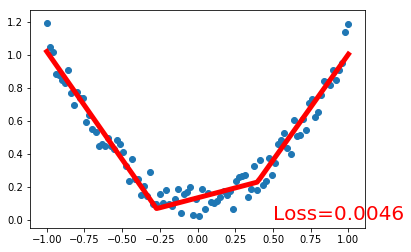

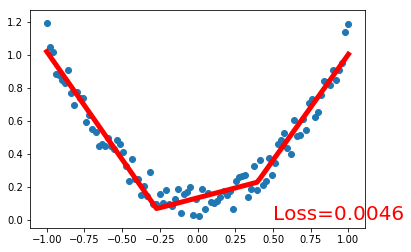

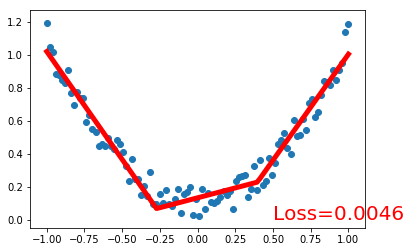

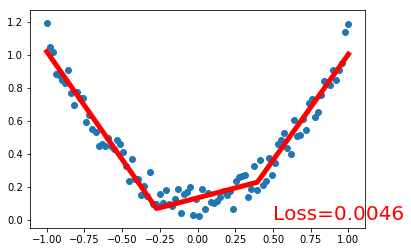

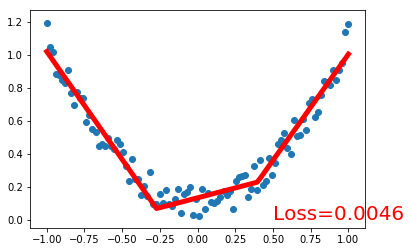

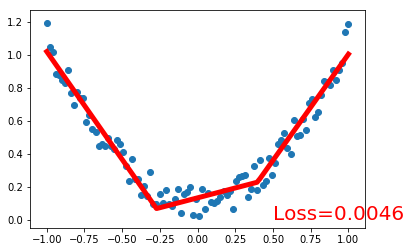

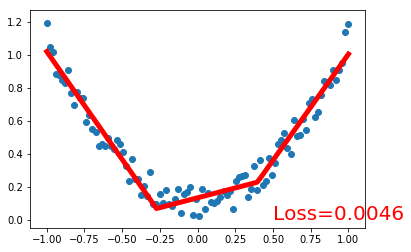

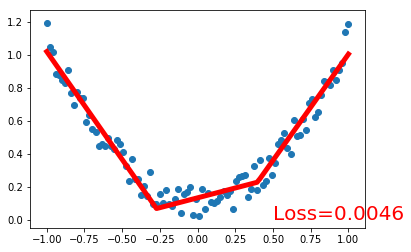

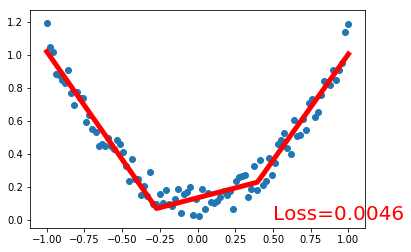

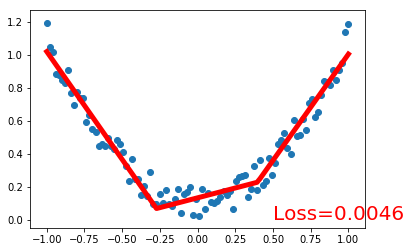

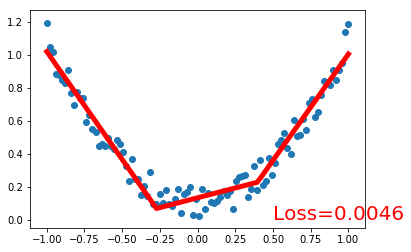

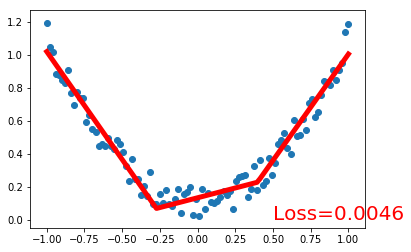

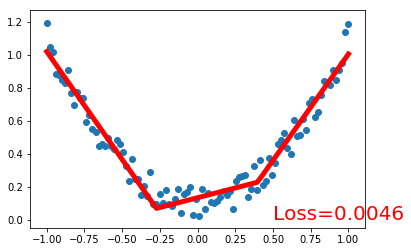

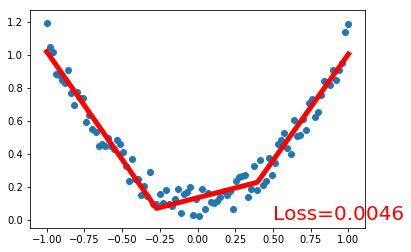

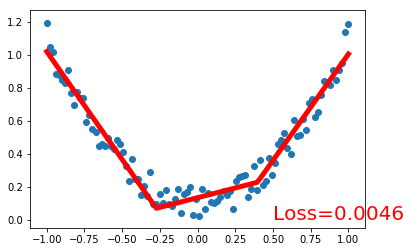

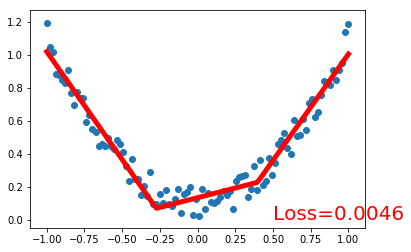

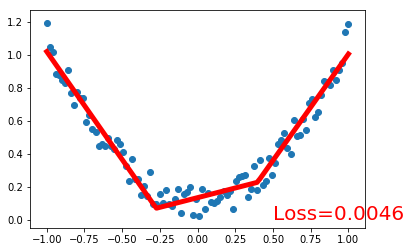

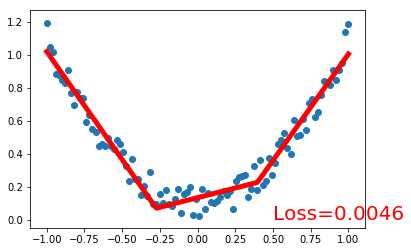

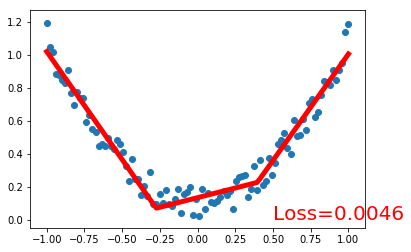

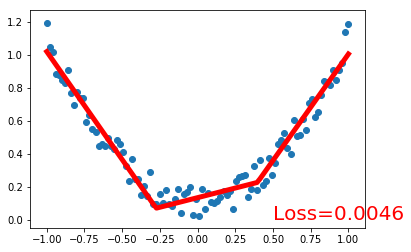

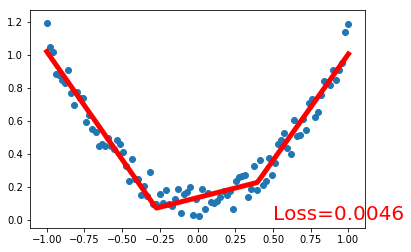

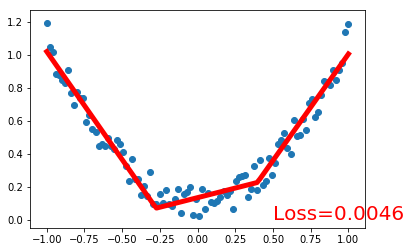

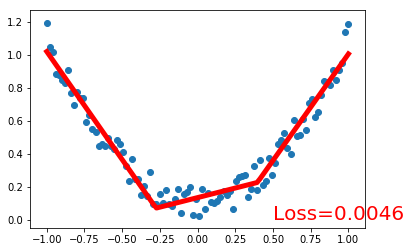

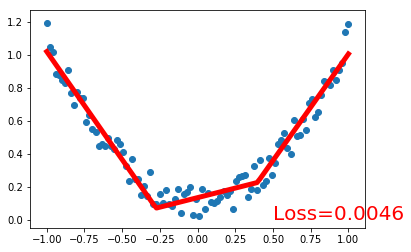

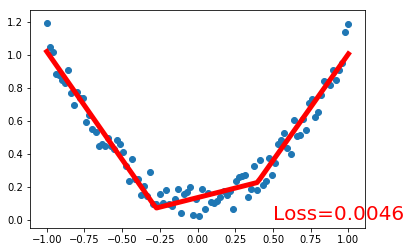

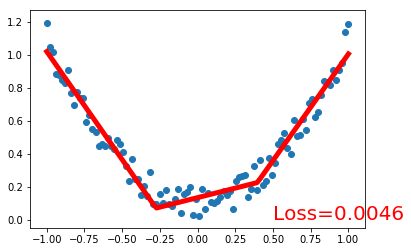

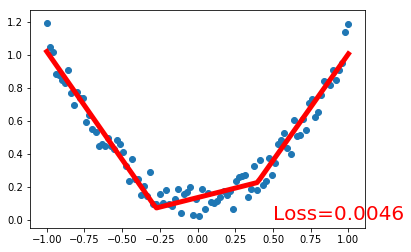

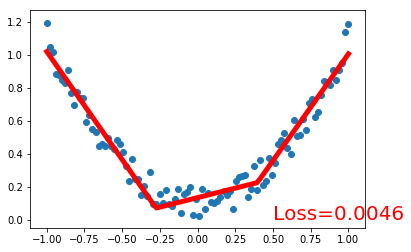

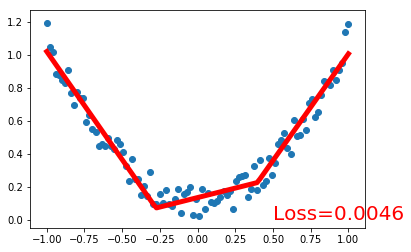

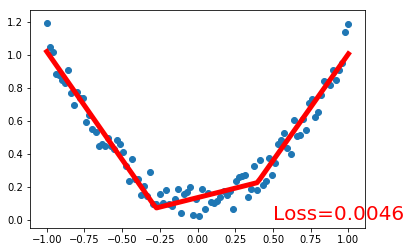

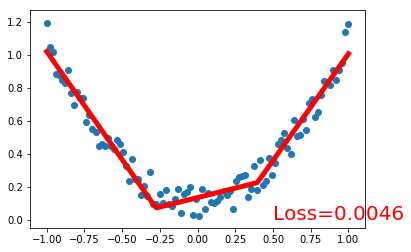

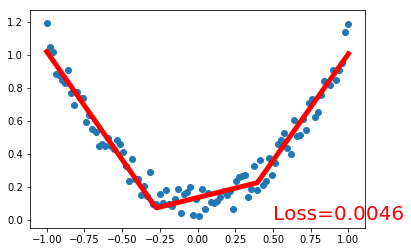

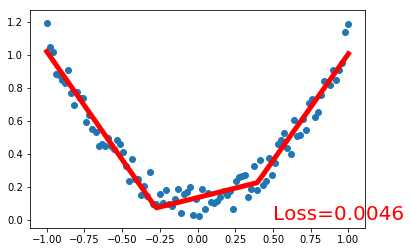

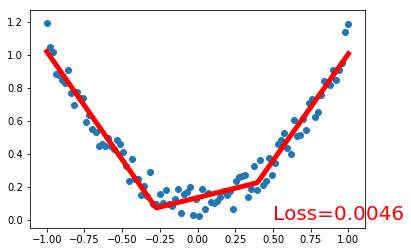

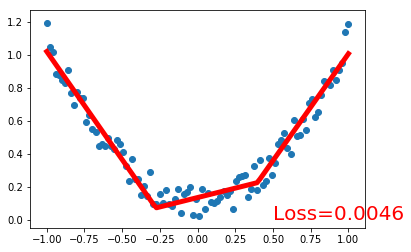

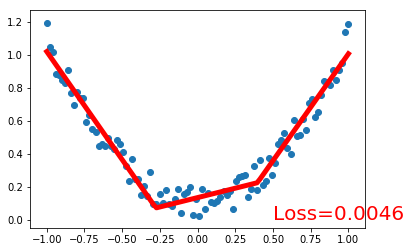

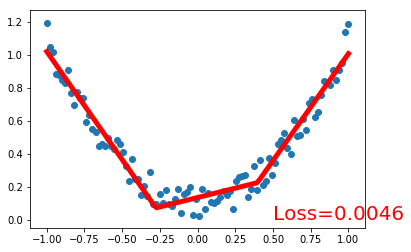

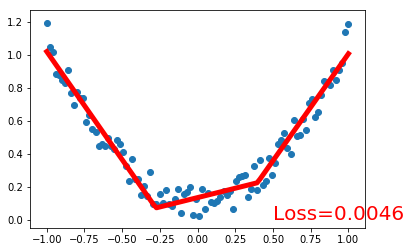

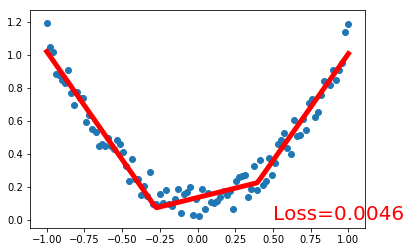

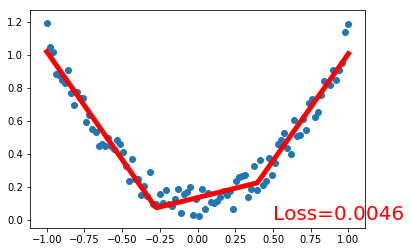

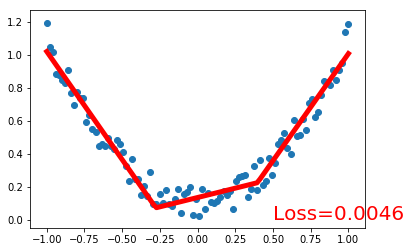

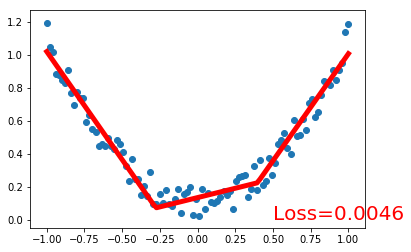

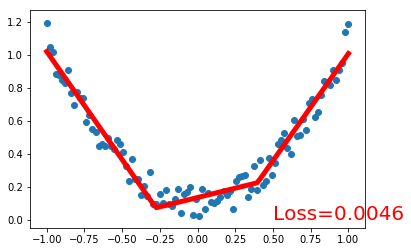

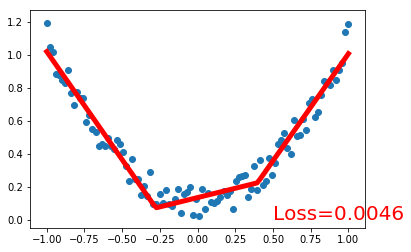

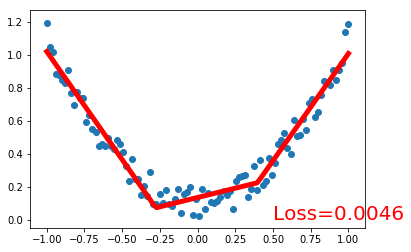

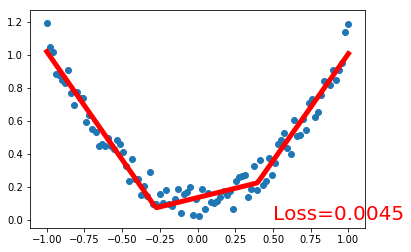

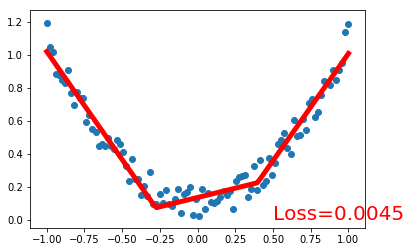

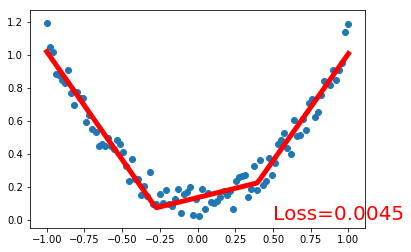

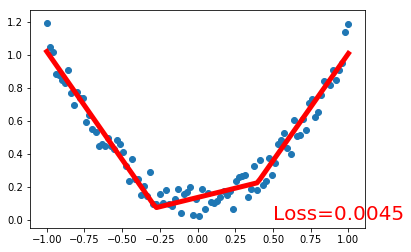

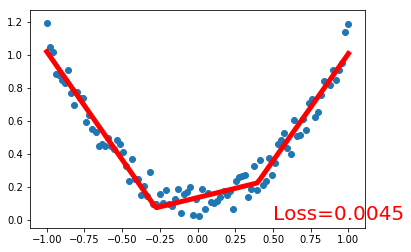

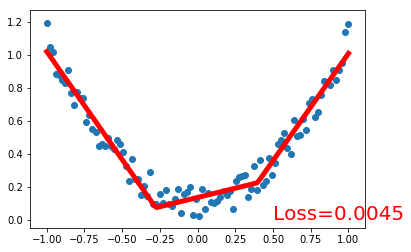

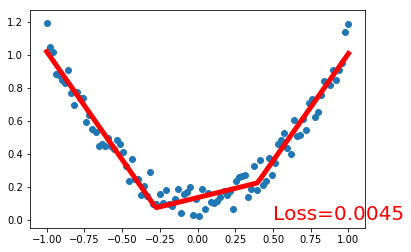

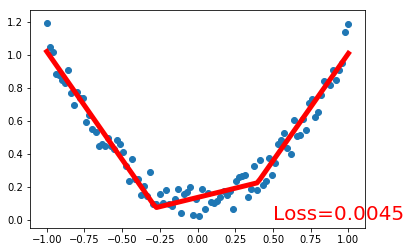

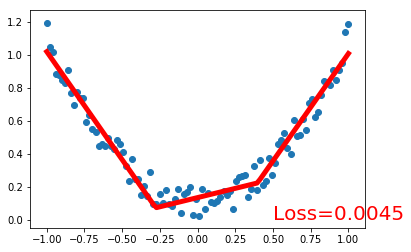

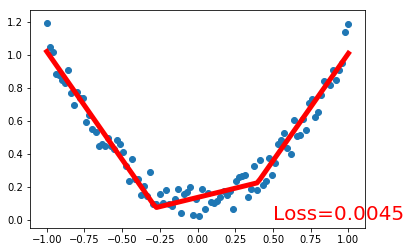

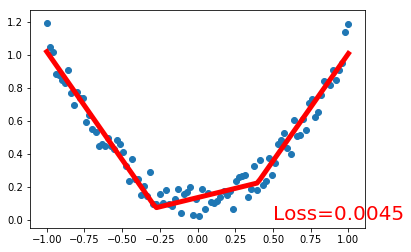

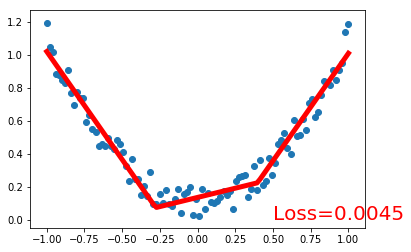

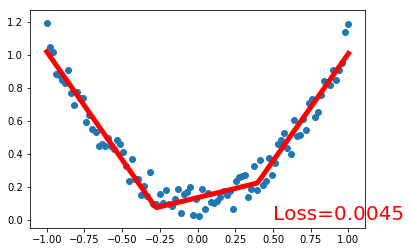

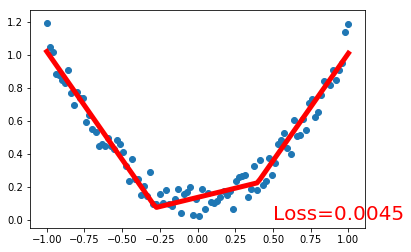

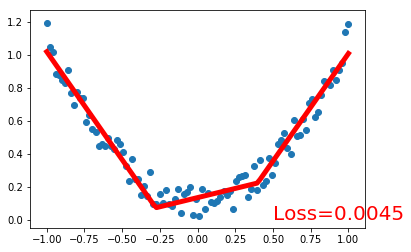

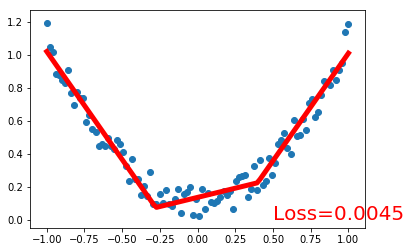

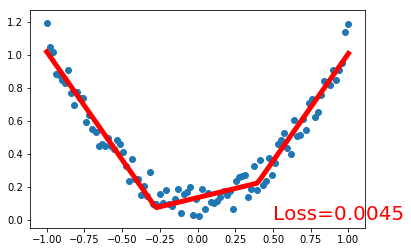

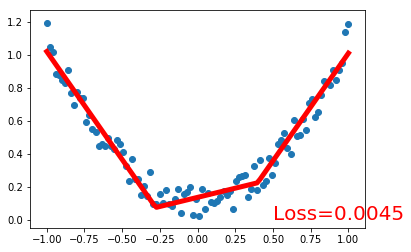

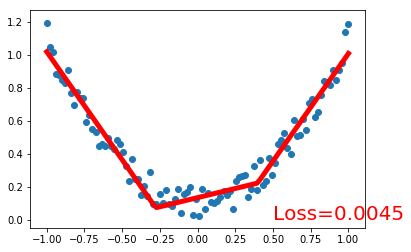

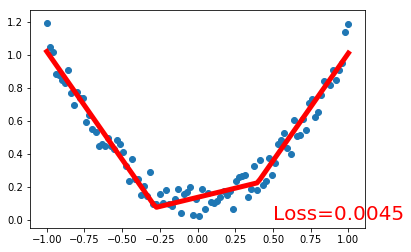

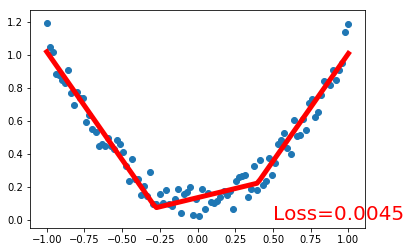

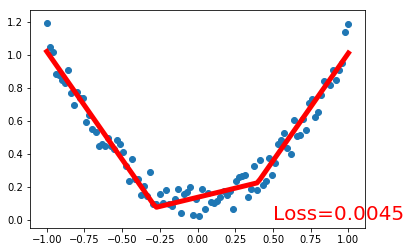

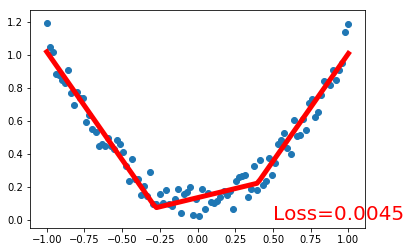

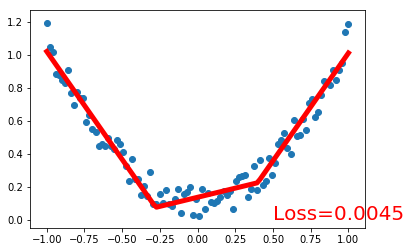

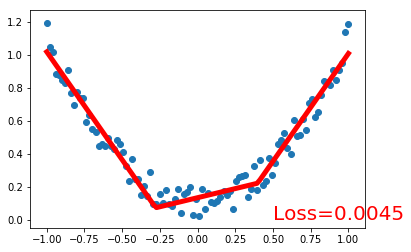

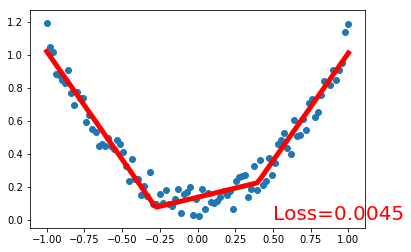

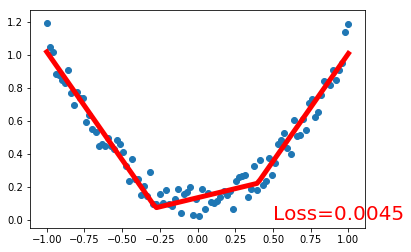

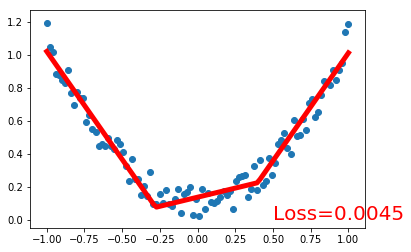

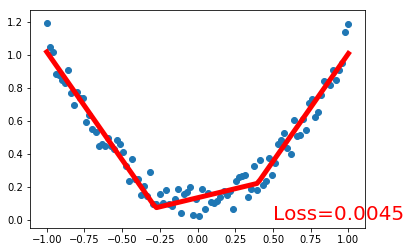

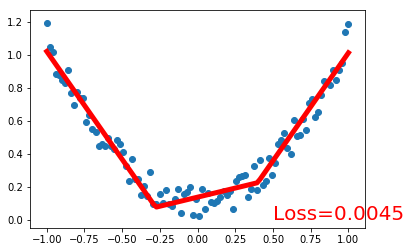

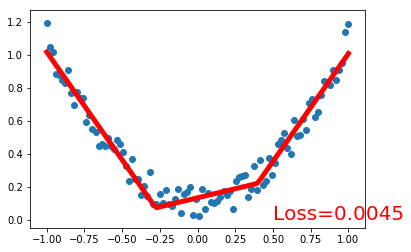

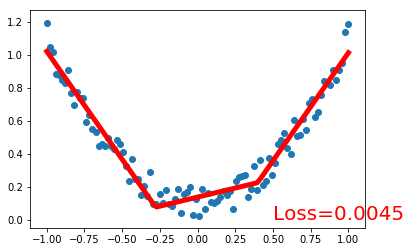

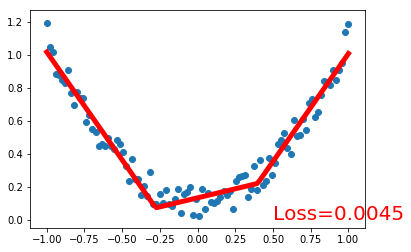

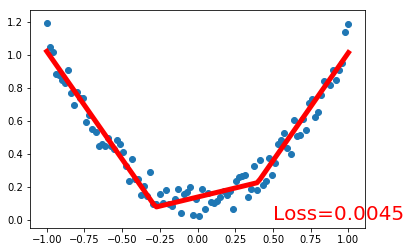

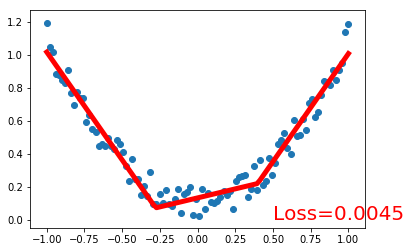

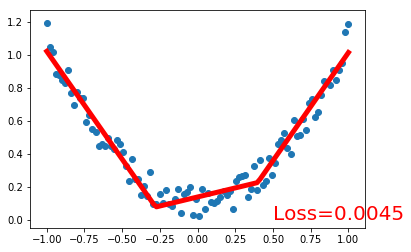

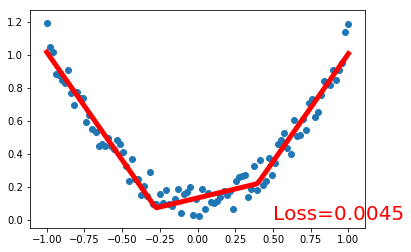

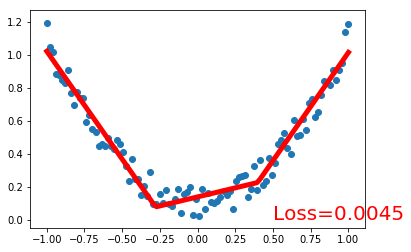

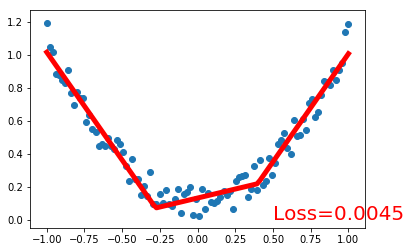

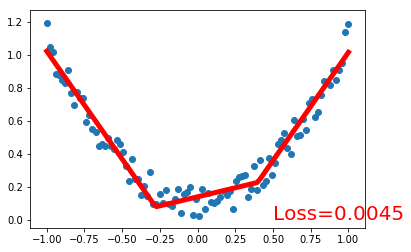

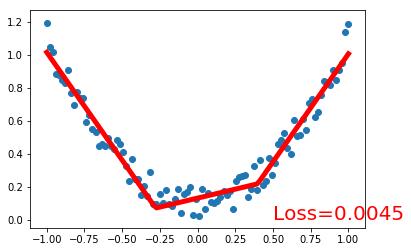

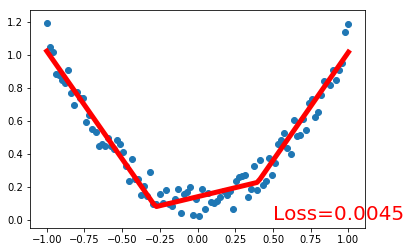

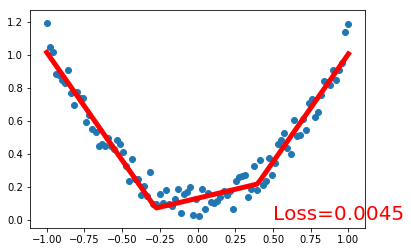

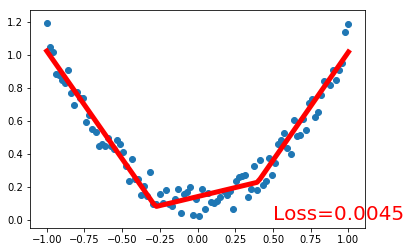

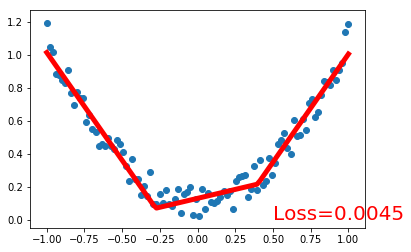

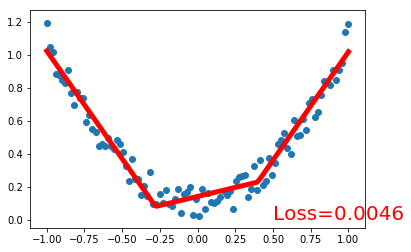

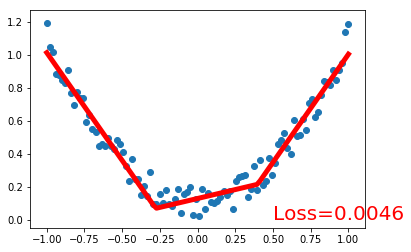

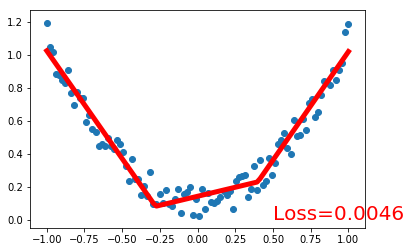

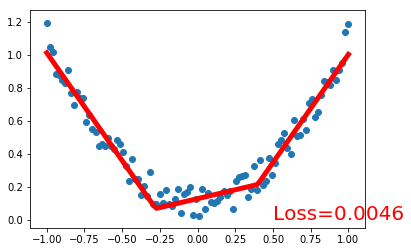

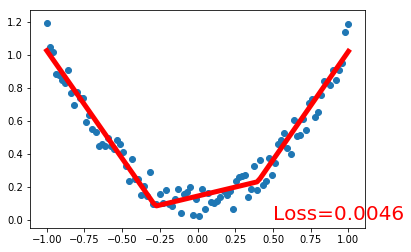

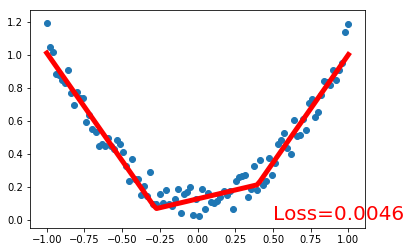

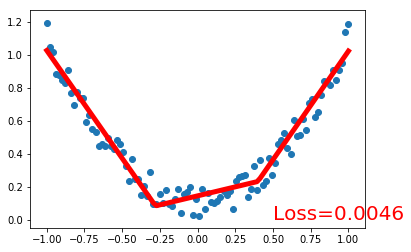

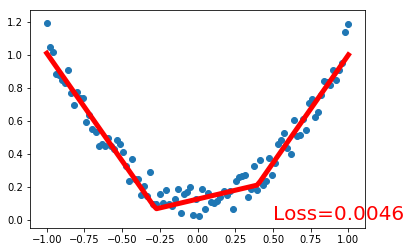

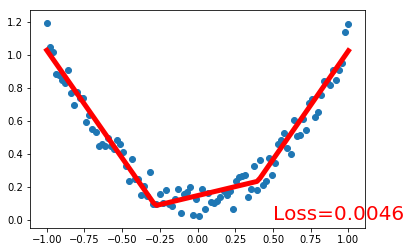

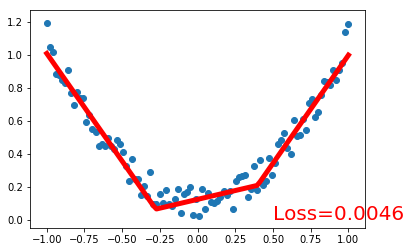

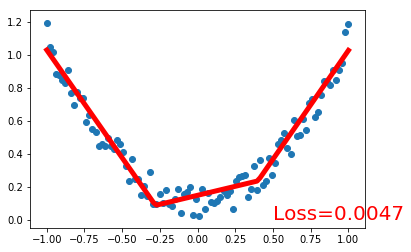

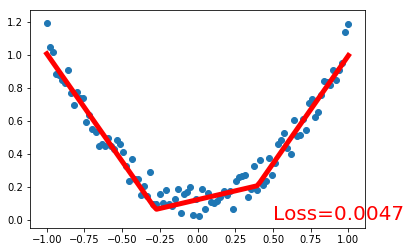

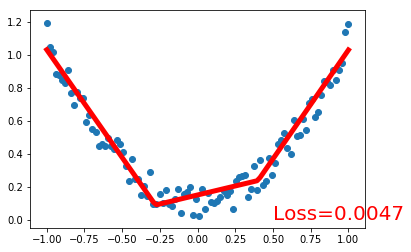

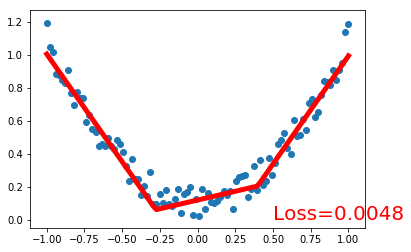

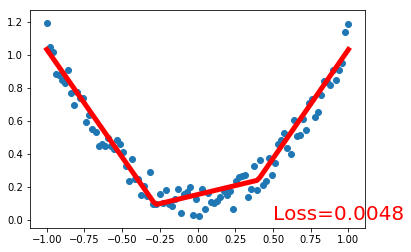

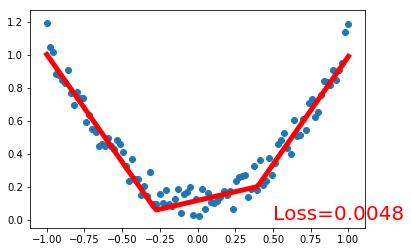

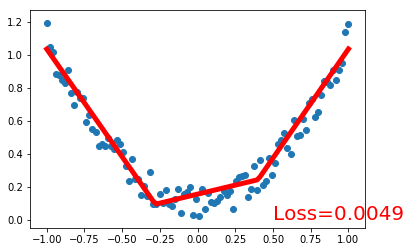

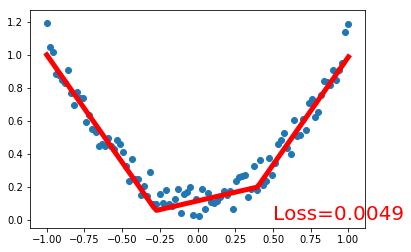

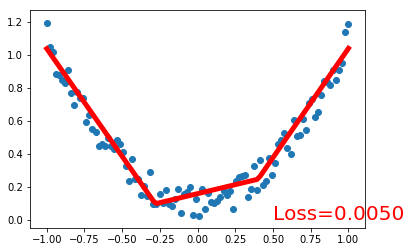

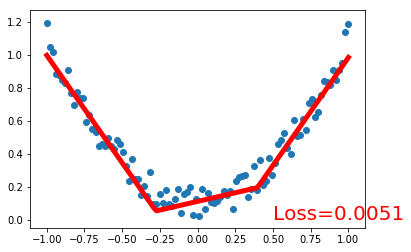

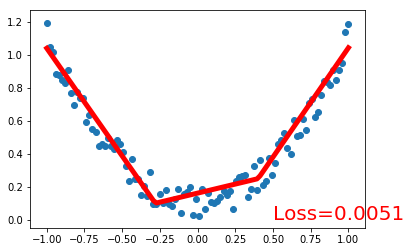

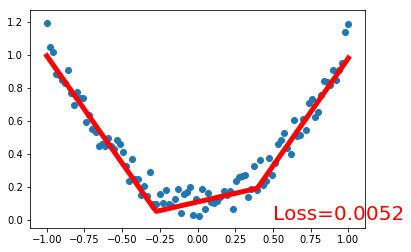

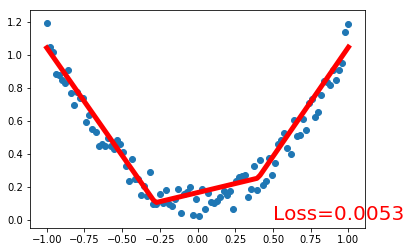

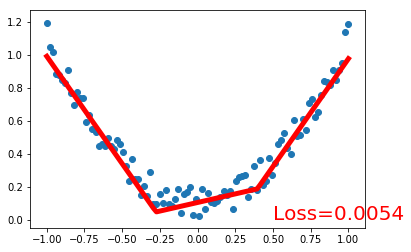

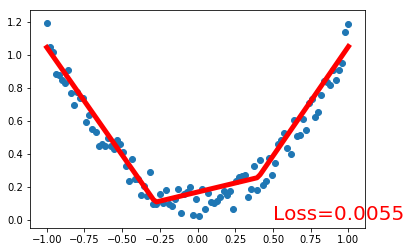

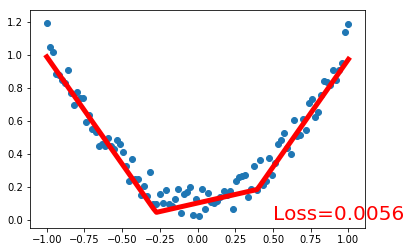

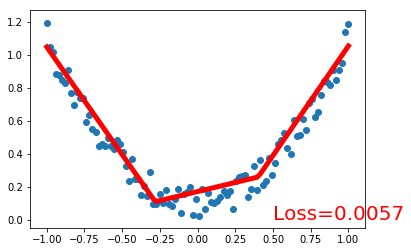

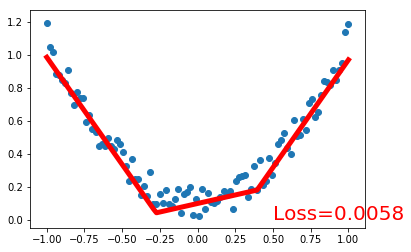

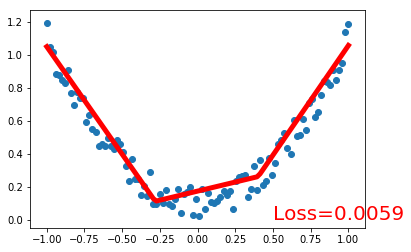

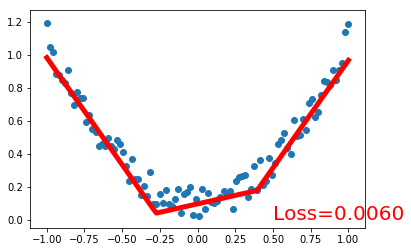

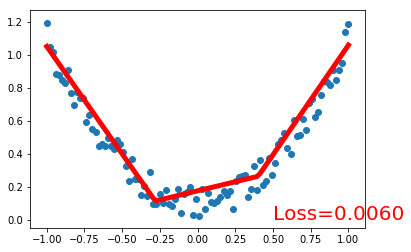

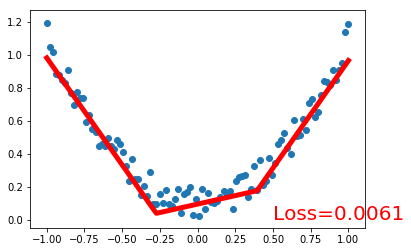

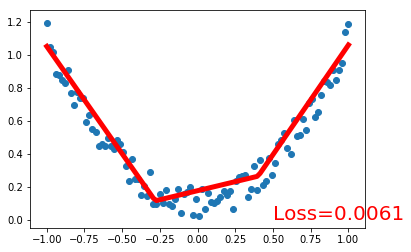

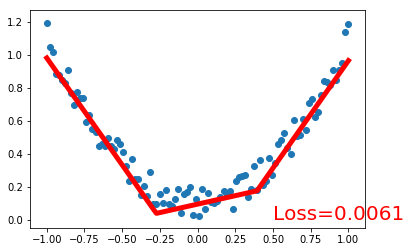

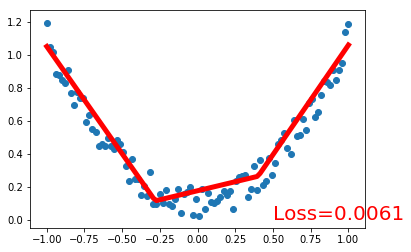

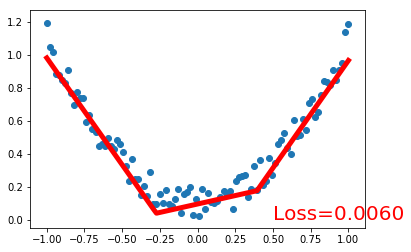

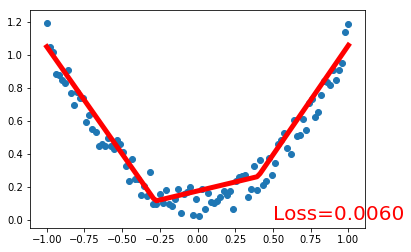

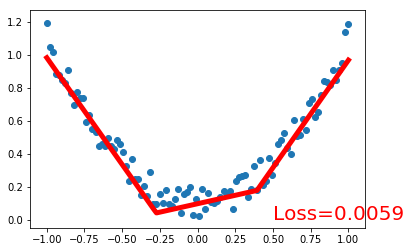

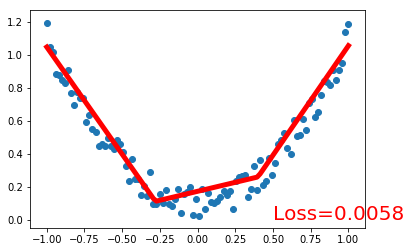

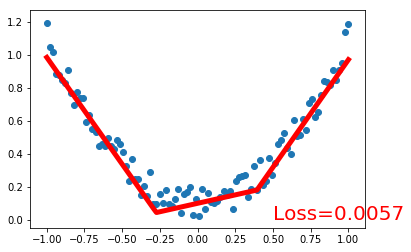

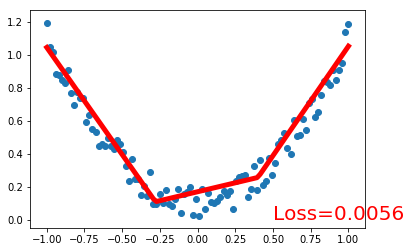

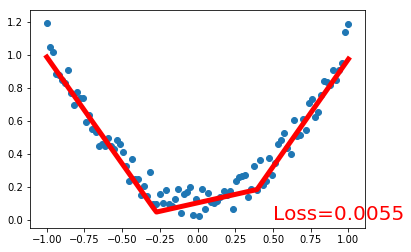

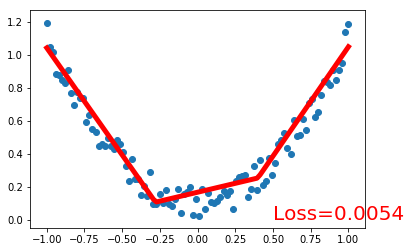

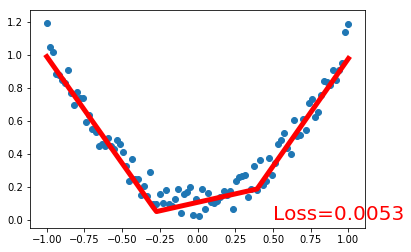

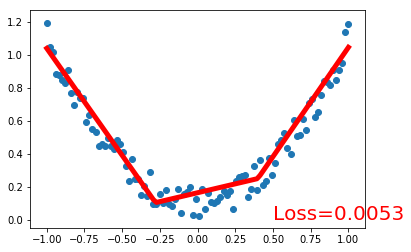

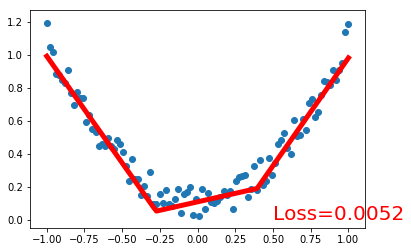

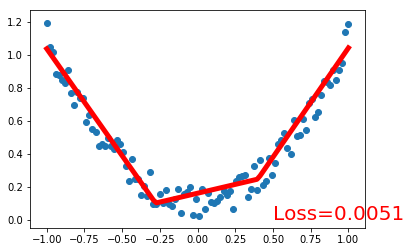

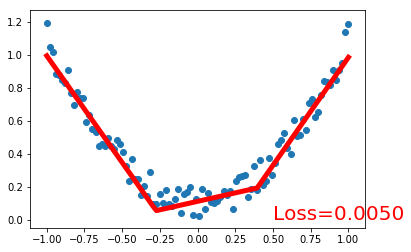

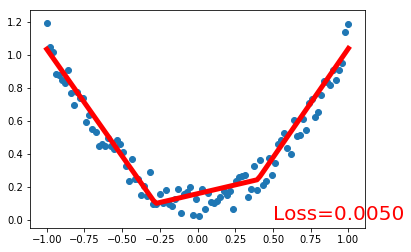

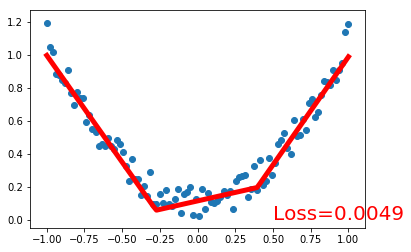

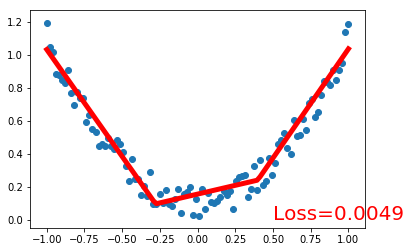

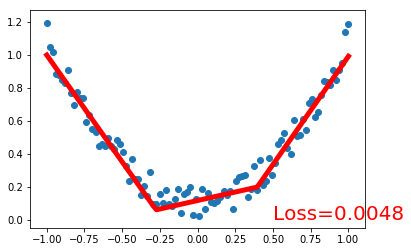

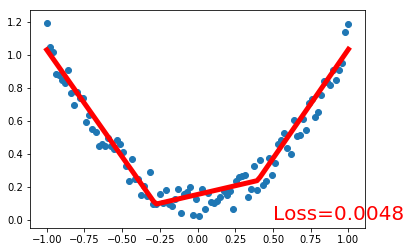

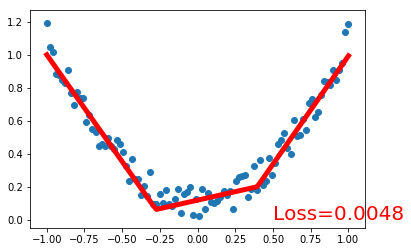

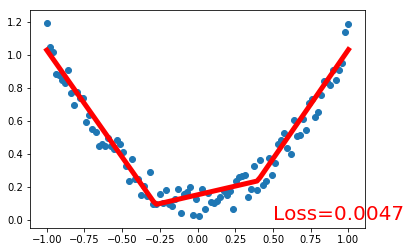

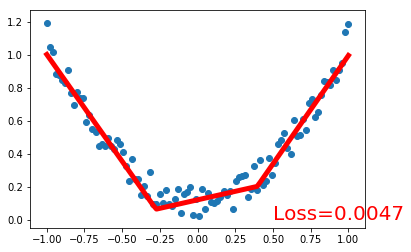

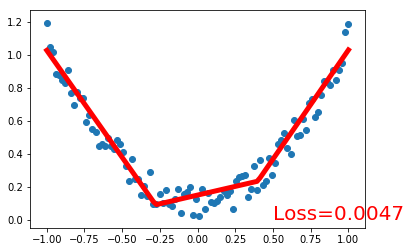

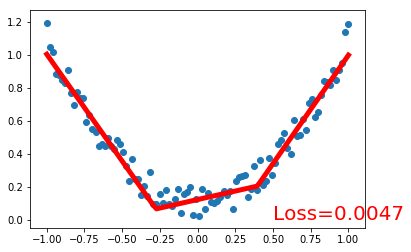

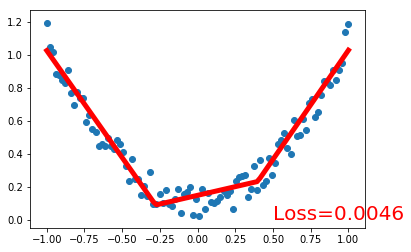

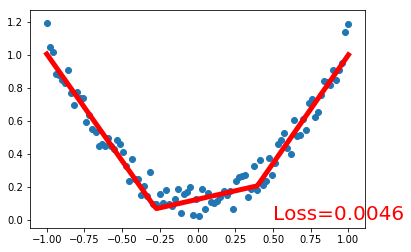

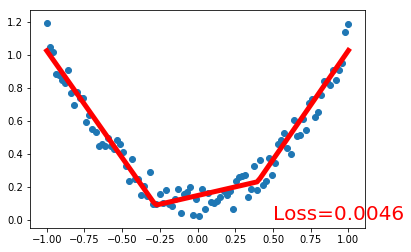

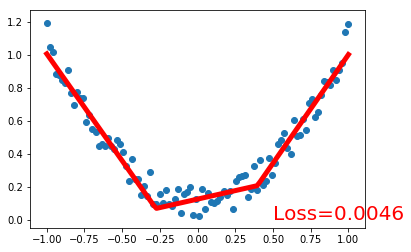

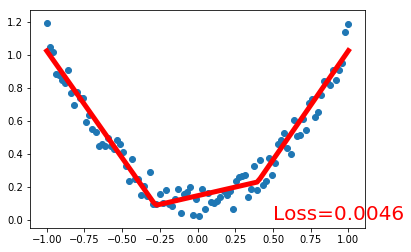

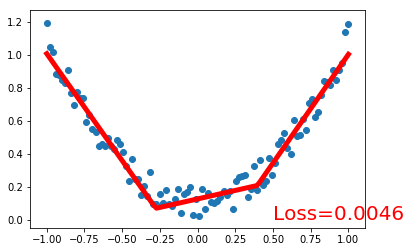

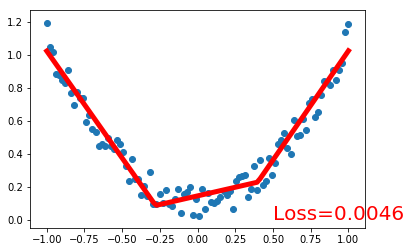

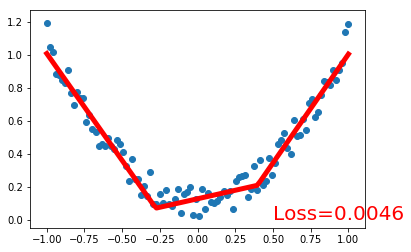

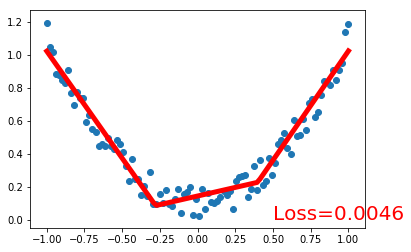

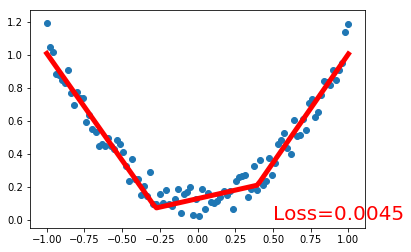

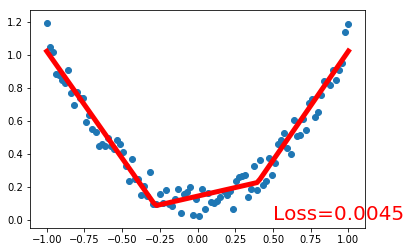

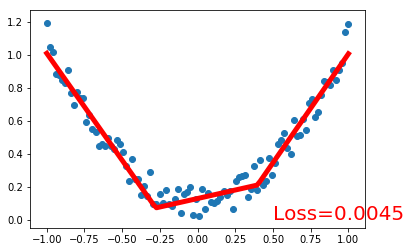

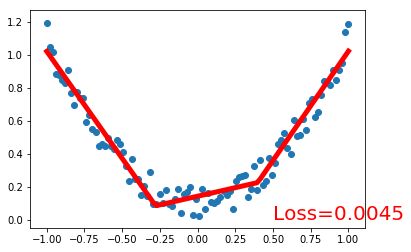

In [50]:
# 开始训练神经网络
# 确定优化器
optimizer=torch.optim.SGD(net.parameters(),lr=0.2)
# 定义损失函数,采用均方误差
loss_func=torch.nn.MSELoss()

# 定义ｅｐｏｃｈ
EPOCHES=2000
for epoch in range(EPOCHES):
    # 调用前向算法
    prediction=net(x)
    # 计算损失函数
    loss=loss_func(prediction,y)
    
    # 初始化rad
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch%5==0:
        plt.cla()
        plt.scatter(x.data.numpy(),y.data.numpy())
        plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)
        plt.text(0.5,0,"Loss=%.4f"%loss.data.numpy(),fontdict={'size':20,'color':'red'})
        plt.pause(0.1)